In [1]:
# https://www.kaggle.com/code/pr4nav101/phishing-website-detection-cnn-lstm

import numpy as np 
import pandas as pd 
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay

import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('stopwords')

from keras import Sequential

import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn import tree
from colorama import Fore  #Colorama is a module to color the python outputs
from urllib.parse import urlparse

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from tld import get_tld, is_tld

# 現在我們可以建立我們的模型。我們將使用一個簡單的LSTM模型。
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

2024-04-03 18:48:31.137099: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/simhoz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv('./dataset/dataset_zenodo_fullset.csv')
df.head(20)

,url,website_links,anchor_url,request_url,email_submission,different_href_urls,right_click_disabled,popup_window_text_fields,iframe_redirection,favicon_external_domain,number_of_forms,number_of_forms_with_get_method,number_of_forms_with_post_method,number_of_applet,number_of_embed,number_of_frame,number_input_password,result
0,http://www.zhuravlik32.net/,114,2,9,1,0,0,0,2,0,1,0,0,0,0,0,0,0
1,http://purchasereturn.info/qs/banks/Desjardins...,26,3,19,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,http://0441ecc.wcomhost.com/trust2/customer_ce...,7,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1
3,http://paypal-girlshop.com/signin/,28,2,4,0,0,0,0,4,0,1,0,1,0,0,0,1,1
4,http://pagesperso-orange.fr/semezies/,16,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,https://maraby.org/lemco/atopo,8,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,http://4matic2018.000webhostapp.com/ludo/DHL/u...,10,1,5,0,0,0,0,0,0,1,0,0,0,0,0,1,1
7,http://iriz.hanazono.ac.jp/zen_centers/centers...,2,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,http://utenzabloccata.com/sella/,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9,http://townsvilleoutriggers.org.au/uploads/pay...,23,1,3,0,0,0,0,2,0,1,0,1,0,0,0,1,1


In [3]:
df['url_len'] = df['url'].apply(lambda x: len(str(x)))


def process_tld(url):
    try:
        # Extract the top level domain (TLD) from the URL given
        res = get_tld(url, as_object = True, fail_silently=False,fix_protocol=True)
        pri_domain= res.parsed_url.netloc
    except :
        pri_domain= None
    return pri_domain

df['domain'] = df['url'].apply(lambda i: process_tld(i))
df.head(20)

,url,website_links,anchor_url,request_url,email_submission,different_href_urls,right_click_disabled,popup_window_text_fields,iframe_redirection,favicon_external_domain,number_of_forms,number_of_forms_with_get_method,number_of_forms_with_post_method,number_of_applet,number_of_embed,number_of_frame,number_input_password,result,url_len,domain
0,http://www.zhuravlik32.net/,114,2,9,1,0,0,0,2,0,1,0,0,0,0,0,0,0,27,www.zhuravlik32.net
1,http://purchasereturn.info/qs/banks/Desjardins...,26,3,19,0,0,0,0,0,0,1,0,0,0,0,0,0,1,67,purchasereturn.info
2,http://0441ecc.wcomhost.com/trust2/customer_ce...,7,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,88,0441ecc.wcomhost.com
3,http://paypal-girlshop.com/signin/,28,2,4,0,0,0,0,4,0,1,0,1,0,0,0,1,1,34,paypal-girlshop.com
4,http://pagesperso-orange.fr/semezies/,16,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,37,pagesperso-orange.fr
5,https://maraby.org/lemco/atopo,8,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,30,maraby.org
6,http://4matic2018.000webhostapp.com/ludo/DHL/u...,10,1,5,0,0,0,0,0,0,1,0,0,0,0,0,1,1,50,4matic2018.000webhostapp.com
7,http://iriz.hanazono.ac.jp/zen_centers/centers...,2,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,64,iriz.hanazono.ac.jp
8,http://utenzabloccata.com/sella/,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,32,utenzabloccata.com
9,http://townsvilleoutriggers.org.au/uploads/pay...,23,1,3,0,0,0,0,2,0,1,0,1,0,0,0,1,1,74,townsvilleoutriggers.org.au


In [4]:
feature = ['@','?','-','=','.','#','%','+','$','!','*',',','//']
for a in feature:
    df[a] = df['url'].apply(lambda i: i.count(a))


def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
df['abnormal_url'] = df['url'].apply(lambda i: abnormal_url(i))  

def httpSecure(url):
    htp = urlparse(url).scheme #It supports the following URL schemes: file , ftp , gopher , hdl , 
                               #http , https ... from urllib.parse
    match = str(htp)
    if match=='https':
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0
df['https'] = df['url'].apply(lambda i: httpSecure(i))

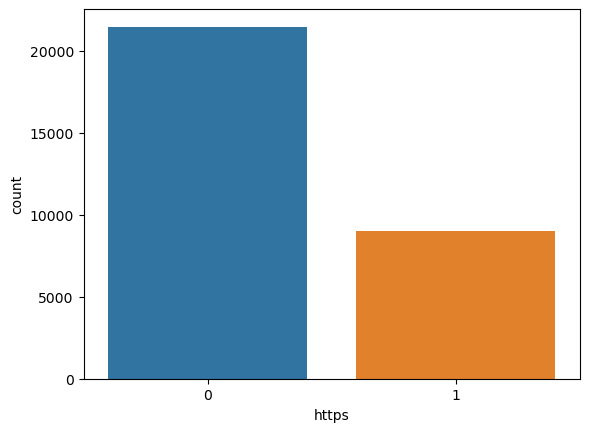

In [5]:
sns.countplot(x='https', data=df);

In [41]:
count_pos = df[df['result'] == 1].shape[0]
count_neg = df[df['result'] == 0].shape[0]
print(f"count_pos:{count_pos} count_neg:{count_neg}")

count_pos:20000 count_neg:10505


In [6]:
def digit_count(url):
    digits = 0
    for i in url:
        if i.isnumeric():
            digits = digits + 1
    return digits
df['digits']= df['url'].apply(lambda i: digit_count(i))

In [7]:
def letter_count(url):
    letters = 0
    for i in url:
        if i.isalpha():
            letters = letters + 1
    return letters
df['letters']= df['url'].apply(lambda i: letter_count(i))

In [8]:
def Shortining_Service(url):
    match = re.search('bit\.ly|goo\.gl|shorte\.st|go2l\.ink|x\.co|ow\.ly|t\.co|tinyurl|tr\.im|is\.gd|cli\.gs|'
                      'yfrog\.com|migre\.me|ff\.im|tiny\.cc|url4\.eu|twit\.ac|su\.pr|twurl\.nl|snipurl\.com|'
                      'short\.to|BudURL\.com|ping\.fm|post\.ly|Just\.as|bkite\.com|snipr\.com|fic\.kr|loopt\.us|'
                      'doiop\.com|short\.ie|kl\.am|wp\.me|rubyurl\.com|om\.ly|to\.ly|bit\.do|t\.co|lnkd\.in|'
                      'db\.tt|qr\.ae|adf\.ly|goo\.gl|bitly\.com|cur\.lv|tinyurl\.com|ow\.ly|bit\.ly|ity\.im|'
                      'q\.gs|is\.gd|po\.st|bc\.vc|twitthis\.com|u\.to|j\.mp|buzurl\.com|cutt\.us|u\.bb|yourls\.org|'
                      'x\.co|prettylinkpro\.com|scrnch\.me|filoops\.info|vzturl\.com|qr\.net|1url\.com|tweez\.me|v\.gd|'
                      'tr\.im|link\.zip\.net',
                      url)
    if match:
        return 1
    else:
        return 0
df['Shortining_Service'] = df['url'].apply(lambda x: Shortining_Service(x))

def having_ip_address(url):
    match = re.search(
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4
        '(([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\.'
        '([01]?\\d\\d?|2[0-4]\\d|25[0-5])\\/)|'  # IPv4 with port
        '((0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\.(0x[0-9a-fA-F]{1,2})\\/)' # IPv4 in hexadecimal
        '(?:[a-fA-F0-9]{1,4}:){7}[a-fA-F0-9]{1,4}|'
        '([0-9]+(?:\.[0-9]+){3}:[0-9]+)|'
        '((?:(?:\d|[01]?\d\d|2[0-4]\d|25[0-5])\.){3}(?:25[0-5]|2[0-4]\d|[01]?\d\d|\d)(?:\/\d{1,2})?)', url)  # Ipv6
    if match:
        return 1
    else:
        return 0
df['having_ip_address'] = df['url'].apply(lambda i: having_ip_address(i))
df.head(20)
df['having_ip_address'].value_counts()

0    30133
1      372
Name: having_ip_address, dtype: int64

<AxesSubplot:>

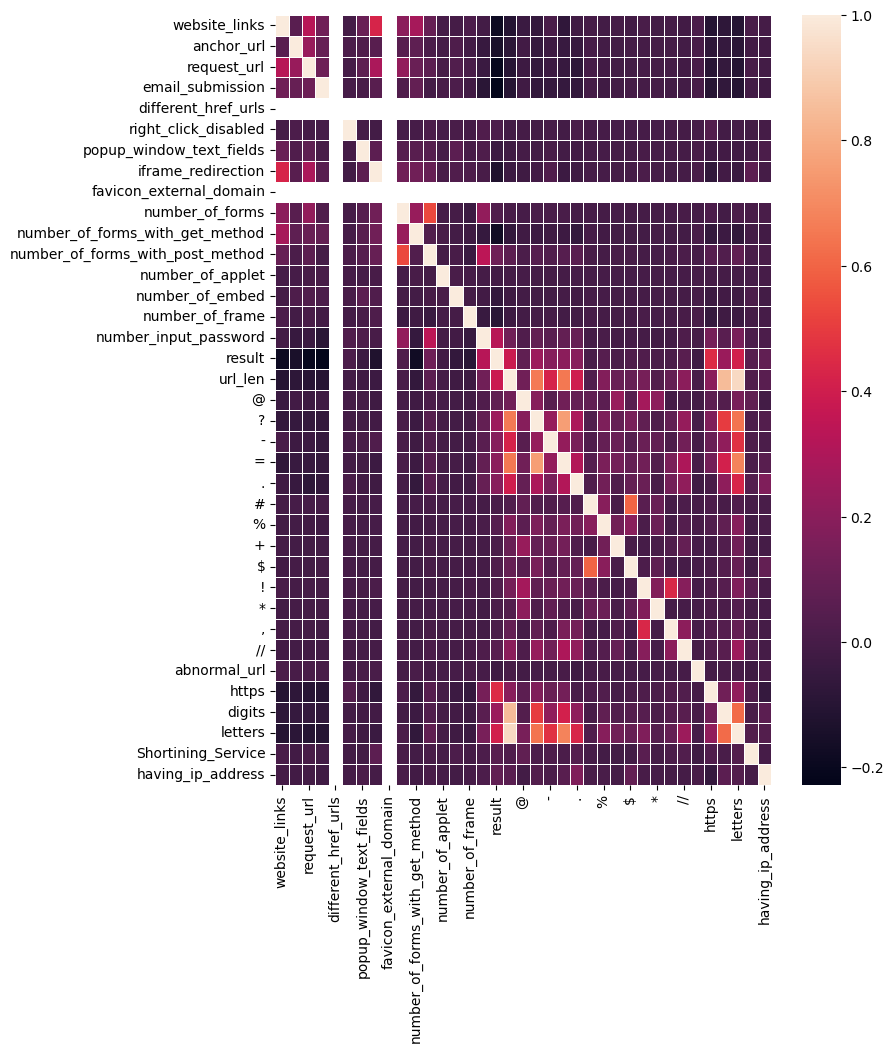

In [9]:
plt.figure(figsize=(8, 10))
sns.heatmap(df.corr(), linewidths=.5)

In [10]:
df.head(10)

,url,website_links,anchor_url,request_url,email_submission,different_href_urls,right_click_disabled,popup_window_text_fields,iframe_redirection,favicon_external_domain,...,!,*,",",//,abnormal_url,https,digits,letters,Shortining_Service,having_ip_address
0,http://www.zhuravlik32.net/,114,2,9,1,0,0,0,2,0,...,0,0,0,1,1,0,2,19,0,0
1,http://purchasereturn.info/qs/banks/Desjardins...,26,3,19,0,0,0,0,0,0,...,0,0,0,1,1,0,11,47,0,0
2,http://0441ecc.wcomhost.com/trust2/customer_ce...,7,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,10,65,1,0
3,http://paypal-girlshop.com/signin/,28,2,4,0,0,0,0,4,0,...,0,0,0,1,1,0,0,27,0,0
4,http://pagesperso-orange.fr/semezies/,16,2,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,30,0,0
5,https://maraby.org/lemco/atopo,8,3,1,0,0,0,0,0,0,...,0,0,0,1,1,1,0,24,0,0
6,http://4matic2018.000webhostapp.com/ludo/DHL/u...,10,1,5,0,0,0,0,0,0,...,0,0,0,1,1,0,8,33,0,0
7,http://iriz.hanazono.ac.jp/zen_centers/centers...,2,3,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,52,0,0
8,http://utenzabloccata.com/sella/,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,0,26,0,0
9,http://townsvilleoutriggers.org.au/uploads/pay...,23,1,3,0,0,0,0,2,0,...,0,0,0,1,1,0,1,62,0,0


In [11]:
Y1 = df['result']
X1 = df.drop(columns = ['url','domain'])

In [12]:
X1.head(2)

,website_links,anchor_url,request_url,email_submission,different_href_urls,right_click_disabled,popup_window_text_fields,iframe_redirection,favicon_external_domain,number_of_forms,...,!,*,",",//,abnormal_url,https,digits,letters,Shortining_Service,having_ip_address
0,114,2,9,1,0,0,0,2,0,1,...,0,0,0,1,1,0,2,19,0,0
1,26,3,19,0,0,0,0,0,0,1,...,0,0,0,1,1,0,11,47,0,0


In [13]:
Y1.head(2)

0    0
1    1
Name: result, dtype: int64

In [14]:
#data for learning without features 

X2 = df['url']
X2.head(2)

0                          http://www.zhuravlik32.net/
1    http://purchasereturn.info/qs/banks/Desjardins...
Name: url, dtype: object

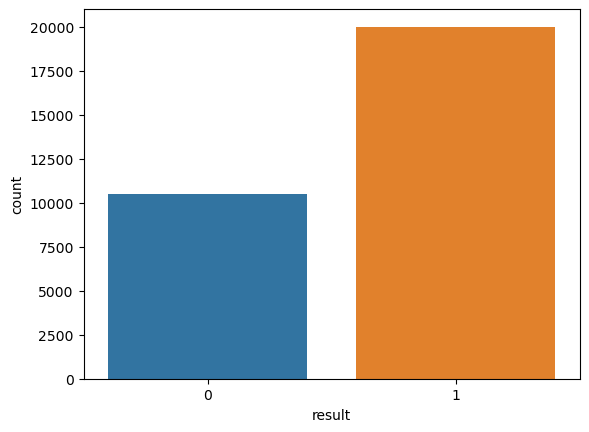

In [15]:
sns.countplot(x='result', data=df);

<AxesSubplot:>

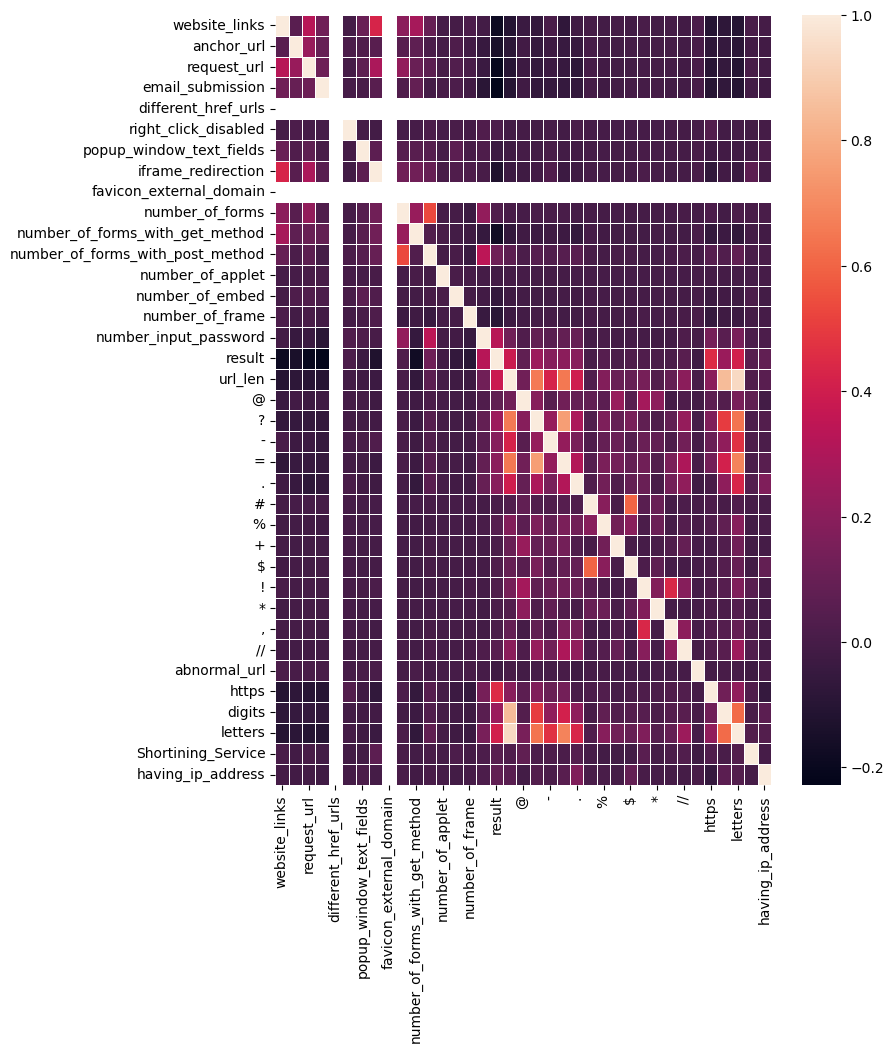

In [16]:
plt.figure(figsize=(8, 10))
sns.heatmap(df.corr(), linewidths=.5)

In [17]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X1,Y1,stratify = Y1,test_size = 0.2,random_state = 42)

In [18]:
X_train1 = np.expand_dims(X_train1, axis=-1)
X_test1 = np.expand_dims(X_test1, axis=-1)

X_train1.shape

(24404, 37, 1)

In [19]:
# CREATING DATASET WITHOUT PRIOR FEATURE EXTRACTION
ps = PorterStemmer()
corpus_train = []

def albumentations(X,corpus_t):
    for i in range(len(X)):
        print(i,"/",len(X))
        review = re.sub("[^a-zA-Z]"," ",X[i])
        review = review.lower()
        review = review.split()
        review = [ps.stem(word) for word in review if word not in set(stopwords.words("english"))] #TO REMOVE STOP WORDS LIKE THE, A ETC 
        review = " ".join(review)
        corpus_t.append(review)
albumentations(X2,corpus_train)

0 / 30505
1 / 30505
2 / 30505
3 / 30505
4 / 30505
5 / 30505
6 / 30505
7 / 30505
8 / 30505
9 / 30505
10 / 30505
11 / 30505
12 / 30505
13 / 30505
14 / 30505
15 / 30505
16 / 30505
17 / 30505
18 / 30505
19 / 30505
20 / 30505
21 / 30505
22 / 30505
23 / 30505
24 / 30505
25 / 30505
26 / 30505
27 / 30505
28 / 30505
29 / 30505
30 / 30505
31 / 30505
32 / 30505
33 / 30505
34 / 30505
35 / 30505
36 / 30505
37 / 30505
38 / 30505
39 / 30505
40 / 30505
41 / 30505
42 / 30505
43 / 30505
44 / 30505
45 / 30505
46 / 30505
47 / 30505
48 / 30505
49 / 30505
50 / 30505
51 / 30505
52 / 30505
53 / 30505
54 / 30505
55 / 30505
56 / 30505
57 / 30505
58 / 30505
59 / 30505
60 / 30505
61 / 30505
62 / 30505
63 / 30505
64 / 30505
65 / 30505
66 / 30505
67 / 30505
68 / 30505
69 / 30505
70 / 30505
71 / 30505
72 / 30505
73 / 30505
74 / 30505
75 / 30505
76 / 30505
77 / 30505
78 / 30505
79 / 30505
80 / 30505
81 / 30505
82 / 30505
83 / 30505
84 / 30505
85 / 30505
86 / 30505
87 / 30505
88 / 30505
89 / 30505
90 / 30505
91 / 3050

725 / 30505
726 / 30505
727 / 30505
728 / 30505
729 / 30505
730 / 30505
731 / 30505
732 / 30505
733 / 30505
734 / 30505
735 / 30505
736 / 30505
737 / 30505
738 / 30505
739 / 30505
740 / 30505
741 / 30505
742 / 30505
743 / 30505
744 / 30505
745 / 30505
746 / 30505
747 / 30505
748 / 30505
749 / 30505
750 / 30505
751 / 30505
752 / 30505
753 / 30505
754 / 30505
755 / 30505
756 / 30505
757 / 30505
758 / 30505
759 / 30505
760 / 30505
761 / 30505
762 / 30505
763 / 30505
764 / 30505
765 / 30505
766 / 30505
767 / 30505
768 / 30505
769 / 30505
770 / 30505
771 / 30505
772 / 30505
773 / 30505
774 / 30505
775 / 30505
776 / 30505
777 / 30505
778 / 30505
779 / 30505
780 / 30505
781 / 30505
782 / 30505
783 / 30505
784 / 30505
785 / 30505
786 / 30505
787 / 30505
788 / 30505
789 / 30505
790 / 30505
791 / 30505
792 / 30505
793 / 30505
794 / 30505
795 / 30505
796 / 30505
797 / 30505
798 / 30505
799 / 30505
800 / 30505
801 / 30505
802 / 30505
803 / 30505
804 / 30505
805 / 30505
806 / 30505
807 / 30505
808 

1378 / 30505
1379 / 30505
1380 / 30505
1381 / 30505
1382 / 30505
1383 / 30505
1384 / 30505
1385 / 30505
1386 / 30505
1387 / 30505
1388 / 30505
1389 / 30505
1390 / 30505
1391 / 30505
1392 / 30505
1393 / 30505
1394 / 30505
1395 / 30505
1396 / 30505
1397 / 30505
1398 / 30505
1399 / 30505
1400 / 30505
1401 / 30505
1402 / 30505
1403 / 30505
1404 / 30505
1405 / 30505
1406 / 30505
1407 / 30505
1408 / 30505
1409 / 30505
1410 / 30505
1411 / 30505
1412 / 30505
1413 / 30505
1414 / 30505
1415 / 30505
1416 / 30505
1417 / 30505
1418 / 30505
1419 / 30505
1420 / 30505
1421 / 30505
1422 / 30505
1423 / 30505
1424 / 30505
1425 / 30505
1426 / 30505
1427 / 30505
1428 / 30505
1429 / 30505
1430 / 30505
1431 / 30505
1432 / 30505
1433 / 30505
1434 / 30505
1435 / 30505
1436 / 30505
1437 / 30505
1438 / 30505
1439 / 30505
1440 / 30505
1441 / 30505
1442 / 30505
1443 / 30505
1444 / 30505
1445 / 30505
1446 / 30505
1447 / 30505
1448 / 30505
1449 / 30505
1450 / 30505
1451 / 30505
1452 / 30505
1453 / 30505
1454 / 30505

2027 / 30505
2028 / 30505
2029 / 30505
2030 / 30505
2031 / 30505
2032 / 30505
2033 / 30505
2034 / 30505
2035 / 30505
2036 / 30505
2037 / 30505
2038 / 30505
2039 / 30505
2040 / 30505
2041 / 30505
2042 / 30505
2043 / 30505
2044 / 30505
2045 / 30505
2046 / 30505
2047 / 30505
2048 / 30505
2049 / 30505
2050 / 30505
2051 / 30505
2052 / 30505
2053 / 30505
2054 / 30505
2055 / 30505
2056 / 30505
2057 / 30505
2058 / 30505
2059 / 30505
2060 / 30505
2061 / 30505
2062 / 30505
2063 / 30505
2064 / 30505
2065 / 30505
2066 / 30505
2067 / 30505
2068 / 30505
2069 / 30505
2070 / 30505
2071 / 30505
2072 / 30505
2073 / 30505
2074 / 30505
2075 / 30505
2076 / 30505
2077 / 30505
2078 / 30505
2079 / 30505
2080 / 30505
2081 / 30505
2082 / 30505
2083 / 30505
2084 / 30505
2085 / 30505
2086 / 30505
2087 / 30505
2088 / 30505
2089 / 30505
2090 / 30505
2091 / 30505
2092 / 30505
2093 / 30505
2094 / 30505
2095 / 30505
2096 / 30505
2097 / 30505
2098 / 30505
2099 / 30505
2100 / 30505
2101 / 30505
2102 / 30505
2103 / 30505

2748 / 30505
2749 / 30505
2750 / 30505
2751 / 30505
2752 / 30505
2753 / 30505
2754 / 30505
2755 / 30505
2756 / 30505
2757 / 30505
2758 / 30505
2759 / 30505
2760 / 30505
2761 / 30505
2762 / 30505
2763 / 30505
2764 / 30505
2765 / 30505
2766 / 30505
2767 / 30505
2768 / 30505
2769 / 30505
2770 / 30505
2771 / 30505
2772 / 30505
2773 / 30505
2774 / 30505
2775 / 30505
2776 / 30505
2777 / 30505
2778 / 30505
2779 / 30505
2780 / 30505
2781 / 30505
2782 / 30505
2783 / 30505
2784 / 30505
2785 / 30505
2786 / 30505
2787 / 30505
2788 / 30505
2789 / 30505
2790 / 30505
2791 / 30505
2792 / 30505
2793 / 30505
2794 / 30505
2795 / 30505
2796 / 30505
2797 / 30505
2798 / 30505
2799 / 30505
2800 / 30505
2801 / 30505
2802 / 30505
2803 / 30505
2804 / 30505
2805 / 30505
2806 / 30505
2807 / 30505
2808 / 30505
2809 / 30505
2810 / 30505
2811 / 30505
2812 / 30505
2813 / 30505
2814 / 30505
2815 / 30505
2816 / 30505
2817 / 30505
2818 / 30505
2819 / 30505
2820 / 30505
2821 / 30505
2822 / 30505
2823 / 30505
2824 / 30505

3393 / 30505
3394 / 30505
3395 / 30505
3396 / 30505
3397 / 30505
3398 / 30505
3399 / 30505
3400 / 30505
3401 / 30505
3402 / 30505
3403 / 30505
3404 / 30505
3405 / 30505
3406 / 30505
3407 / 30505
3408 / 30505
3409 / 30505
3410 / 30505
3411 / 30505
3412 / 30505
3413 / 30505
3414 / 30505
3415 / 30505
3416 / 30505
3417 / 30505
3418 / 30505
3419 / 30505
3420 / 30505
3421 / 30505
3422 / 30505
3423 / 30505
3424 / 30505
3425 / 30505
3426 / 30505
3427 / 30505
3428 / 30505
3429 / 30505
3430 / 30505
3431 / 30505
3432 / 30505
3433 / 30505
3434 / 30505
3435 / 30505
3436 / 30505
3437 / 30505
3438 / 30505
3439 / 30505
3440 / 30505
3441 / 30505
3442 / 30505
3443 / 30505
3444 / 30505
3445 / 30505
3446 / 30505
3447 / 30505
3448 / 30505
3449 / 30505
3450 / 30505
3451 / 30505
3452 / 30505
3453 / 30505
3454 / 30505
3455 / 30505
3456 / 30505
3457 / 30505
3458 / 30505
3459 / 30505
3460 / 30505
3461 / 30505
3462 / 30505
3463 / 30505
3464 / 30505
3465 / 30505
3466 / 30505
3467 / 30505
3468 / 30505
3469 / 30505

4081 / 30505
4082 / 30505
4083 / 30505
4084 / 30505
4085 / 30505
4086 / 30505
4087 / 30505
4088 / 30505
4089 / 30505
4090 / 30505
4091 / 30505
4092 / 30505
4093 / 30505
4094 / 30505
4095 / 30505
4096 / 30505
4097 / 30505
4098 / 30505
4099 / 30505
4100 / 30505
4101 / 30505
4102 / 30505
4103 / 30505
4104 / 30505
4105 / 30505
4106 / 30505
4107 / 30505
4108 / 30505
4109 / 30505
4110 / 30505
4111 / 30505
4112 / 30505
4113 / 30505
4114 / 30505
4115 / 30505
4116 / 30505
4117 / 30505
4118 / 30505
4119 / 30505
4120 / 30505
4121 / 30505
4122 / 30505
4123 / 30505
4124 / 30505
4125 / 30505
4126 / 30505
4127 / 30505
4128 / 30505
4129 / 30505
4130 / 30505
4131 / 30505
4132 / 30505
4133 / 30505
4134 / 30505
4135 / 30505
4136 / 30505
4137 / 30505
4138 / 30505
4139 / 30505
4140 / 30505
4141 / 30505
4142 / 30505
4143 / 30505
4144 / 30505
4145 / 30505
4146 / 30505
4147 / 30505
4148 / 30505
4149 / 30505
4150 / 30505
4151 / 30505
4152 / 30505
4153 / 30505
4154 / 30505
4155 / 30505
4156 / 30505
4157 / 30505

4727 / 30505
4728 / 30505
4729 / 30505
4730 / 30505
4731 / 30505
4732 / 30505
4733 / 30505
4734 / 30505
4735 / 30505
4736 / 30505
4737 / 30505
4738 / 30505
4739 / 30505
4740 / 30505
4741 / 30505
4742 / 30505
4743 / 30505
4744 / 30505
4745 / 30505
4746 / 30505
4747 / 30505
4748 / 30505
4749 / 30505
4750 / 30505
4751 / 30505
4752 / 30505
4753 / 30505
4754 / 30505
4755 / 30505
4756 / 30505
4757 / 30505
4758 / 30505
4759 / 30505
4760 / 30505
4761 / 30505
4762 / 30505
4763 / 30505
4764 / 30505
4765 / 30505
4766 / 30505
4767 / 30505
4768 / 30505
4769 / 30505
4770 / 30505
4771 / 30505
4772 / 30505
4773 / 30505
4774 / 30505
4775 / 30505
4776 / 30505
4777 / 30505
4778 / 30505
4779 / 30505
4780 / 30505
4781 / 30505
4782 / 30505
4783 / 30505
4784 / 30505
4785 / 30505
4786 / 30505
4787 / 30505
4788 / 30505
4789 / 30505
4790 / 30505
4791 / 30505
4792 / 30505
4793 / 30505
4794 / 30505
4795 / 30505
4796 / 30505
4797 / 30505
4798 / 30505
4799 / 30505
4800 / 30505
4801 / 30505
4802 / 30505
4803 / 30505

5400 / 30505
5401 / 30505
5402 / 30505
5403 / 30505
5404 / 30505
5405 / 30505
5406 / 30505
5407 / 30505
5408 / 30505
5409 / 30505
5410 / 30505
5411 / 30505
5412 / 30505
5413 / 30505
5414 / 30505
5415 / 30505
5416 / 30505
5417 / 30505
5418 / 30505
5419 / 30505
5420 / 30505
5421 / 30505
5422 / 30505
5423 / 30505
5424 / 30505
5425 / 30505
5426 / 30505
5427 / 30505
5428 / 30505
5429 / 30505
5430 / 30505
5431 / 30505
5432 / 30505
5433 / 30505
5434 / 30505
5435 / 30505
5436 / 30505
5437 / 30505
5438 / 30505
5439 / 30505
5440 / 30505
5441 / 30505
5442 / 30505
5443 / 30505
5444 / 30505
5445 / 30505
5446 / 30505
5447 / 30505
5448 / 30505
5449 / 30505
5450 / 30505
5451 / 30505
5452 / 30505
5453 / 30505
5454 / 30505
5455 / 30505
5456 / 30505
5457 / 30505
5458 / 30505
5459 / 30505
5460 / 30505
5461 / 30505
5462 / 30505
5463 / 30505
5464 / 30505
5465 / 30505
5466 / 30505
5467 / 30505
5468 / 30505
5469 / 30505
5470 / 30505
5471 / 30505
5472 / 30505
5473 / 30505
5474 / 30505
5475 / 30505
5476 / 30505

6130 / 30505
6131 / 30505
6132 / 30505
6133 / 30505
6134 / 30505
6135 / 30505
6136 / 30505
6137 / 30505
6138 / 30505
6139 / 30505
6140 / 30505
6141 / 30505
6142 / 30505
6143 / 30505
6144 / 30505
6145 / 30505
6146 / 30505
6147 / 30505
6148 / 30505
6149 / 30505
6150 / 30505
6151 / 30505
6152 / 30505
6153 / 30505
6154 / 30505
6155 / 30505
6156 / 30505
6157 / 30505
6158 / 30505
6159 / 30505
6160 / 30505
6161 / 30505
6162 / 30505
6163 / 30505
6164 / 30505
6165 / 30505
6166 / 30505
6167 / 30505
6168 / 30505
6169 / 30505
6170 / 30505
6171 / 30505
6172 / 30505
6173 / 30505
6174 / 30505
6175 / 30505
6176 / 30505
6177 / 30505
6178 / 30505
6179 / 30505
6180 / 30505
6181 / 30505
6182 / 30505
6183 / 30505
6184 / 30505
6185 / 30505
6186 / 30505
6187 / 30505
6188 / 30505
6189 / 30505
6190 / 30505
6191 / 30505
6192 / 30505
6193 / 30505
6194 / 30505
6195 / 30505
6196 / 30505
6197 / 30505
6198 / 30505
6199 / 30505
6200 / 30505
6201 / 30505
6202 / 30505
6203 / 30505
6204 / 30505
6205 / 30505
6206 / 30505

6857 / 30505
6858 / 30505
6859 / 30505
6860 / 30505
6861 / 30505
6862 / 30505
6863 / 30505
6864 / 30505
6865 / 30505
6866 / 30505
6867 / 30505
6868 / 30505
6869 / 30505
6870 / 30505
6871 / 30505
6872 / 30505
6873 / 30505
6874 / 30505
6875 / 30505
6876 / 30505
6877 / 30505
6878 / 30505
6879 / 30505
6880 / 30505
6881 / 30505
6882 / 30505
6883 / 30505
6884 / 30505
6885 / 30505
6886 / 30505
6887 / 30505
6888 / 30505
6889 / 30505
6890 / 30505
6891 / 30505
6892 / 30505
6893 / 30505
6894 / 30505
6895 / 30505
6896 / 30505
6897 / 30505
6898 / 30505
6899 / 30505
6900 / 30505
6901 / 30505
6902 / 30505
6903 / 30505
6904 / 30505
6905 / 30505
6906 / 30505
6907 / 30505
6908 / 30505
6909 / 30505
6910 / 30505
6911 / 30505
6912 / 30505
6913 / 30505
6914 / 30505
6915 / 30505
6916 / 30505
6917 / 30505
6918 / 30505
6919 / 30505
6920 / 30505
6921 / 30505
6922 / 30505
6923 / 30505
6924 / 30505
6925 / 30505
6926 / 30505
6927 / 30505
6928 / 30505
6929 / 30505
6930 / 30505
6931 / 30505
6932 / 30505
6933 / 30505

7555 / 30505
7556 / 30505
7557 / 30505
7558 / 30505
7559 / 30505
7560 / 30505
7561 / 30505
7562 / 30505
7563 / 30505
7564 / 30505
7565 / 30505
7566 / 30505
7567 / 30505
7568 / 30505
7569 / 30505
7570 / 30505
7571 / 30505
7572 / 30505
7573 / 30505
7574 / 30505
7575 / 30505
7576 / 30505
7577 / 30505
7578 / 30505
7579 / 30505
7580 / 30505
7581 / 30505
7582 / 30505
7583 / 30505
7584 / 30505
7585 / 30505
7586 / 30505
7587 / 30505
7588 / 30505
7589 / 30505
7590 / 30505
7591 / 30505
7592 / 30505
7593 / 30505
7594 / 30505
7595 / 30505
7596 / 30505
7597 / 30505
7598 / 30505
7599 / 30505
7600 / 30505
7601 / 30505
7602 / 30505
7603 / 30505
7604 / 30505
7605 / 30505
7606 / 30505
7607 / 30505
7608 / 30505
7609 / 30505
7610 / 30505
7611 / 30505
7612 / 30505
7613 / 30505
7614 / 30505
7615 / 30505
7616 / 30505
7617 / 30505
7618 / 30505
7619 / 30505
7620 / 30505
7621 / 30505
7622 / 30505
7623 / 30505
7624 / 30505
7625 / 30505
7626 / 30505
7627 / 30505
7628 / 30505
7629 / 30505
7630 / 30505
7631 / 30505

8212 / 30505
8213 / 30505
8214 / 30505
8215 / 30505
8216 / 30505
8217 / 30505
8218 / 30505
8219 / 30505
8220 / 30505
8221 / 30505
8222 / 30505
8223 / 30505
8224 / 30505
8225 / 30505
8226 / 30505
8227 / 30505
8228 / 30505
8229 / 30505
8230 / 30505
8231 / 30505
8232 / 30505
8233 / 30505
8234 / 30505
8235 / 30505
8236 / 30505
8237 / 30505
8238 / 30505
8239 / 30505
8240 / 30505
8241 / 30505
8242 / 30505
8243 / 30505
8244 / 30505
8245 / 30505
8246 / 30505
8247 / 30505
8248 / 30505
8249 / 30505
8250 / 30505
8251 / 30505
8252 / 30505
8253 / 30505
8254 / 30505
8255 / 30505
8256 / 30505
8257 / 30505
8258 / 30505
8259 / 30505
8260 / 30505
8261 / 30505
8262 / 30505
8263 / 30505
8264 / 30505
8265 / 30505
8266 / 30505
8267 / 30505
8268 / 30505
8269 / 30505
8270 / 30505
8271 / 30505
8272 / 30505
8273 / 30505
8274 / 30505
8275 / 30505
8276 / 30505
8277 / 30505
8278 / 30505
8279 / 30505
8280 / 30505
8281 / 30505
8282 / 30505
8283 / 30505
8284 / 30505
8285 / 30505
8286 / 30505
8287 / 30505
8288 / 30505

8890 / 30505
8891 / 30505
8892 / 30505
8893 / 30505
8894 / 30505
8895 / 30505
8896 / 30505
8897 / 30505
8898 / 30505
8899 / 30505
8900 / 30505
8901 / 30505
8902 / 30505
8903 / 30505
8904 / 30505
8905 / 30505
8906 / 30505
8907 / 30505
8908 / 30505
8909 / 30505
8910 / 30505
8911 / 30505
8912 / 30505
8913 / 30505
8914 / 30505
8915 / 30505
8916 / 30505
8917 / 30505
8918 / 30505
8919 / 30505
8920 / 30505
8921 / 30505
8922 / 30505
8923 / 30505
8924 / 30505
8925 / 30505
8926 / 30505
8927 / 30505
8928 / 30505
8929 / 30505
8930 / 30505
8931 / 30505
8932 / 30505
8933 / 30505
8934 / 30505
8935 / 30505
8936 / 30505
8937 / 30505
8938 / 30505
8939 / 30505
8940 / 30505
8941 / 30505
8942 / 30505
8943 / 30505
8944 / 30505
8945 / 30505
8946 / 30505
8947 / 30505
8948 / 30505
8949 / 30505
8950 / 30505
8951 / 30505
8952 / 30505
8953 / 30505
8954 / 30505
8955 / 30505
8956 / 30505
8957 / 30505
8958 / 30505
8959 / 30505
8960 / 30505
8961 / 30505
8962 / 30505
8963 / 30505
8964 / 30505
8965 / 30505
8966 / 30505

9570 / 30505
9571 / 30505
9572 / 30505
9573 / 30505
9574 / 30505
9575 / 30505
9576 / 30505
9577 / 30505
9578 / 30505
9579 / 30505
9580 / 30505
9581 / 30505
9582 / 30505
9583 / 30505
9584 / 30505
9585 / 30505
9586 / 30505
9587 / 30505
9588 / 30505
9589 / 30505
9590 / 30505
9591 / 30505
9592 / 30505
9593 / 30505
9594 / 30505
9595 / 30505
9596 / 30505
9597 / 30505
9598 / 30505
9599 / 30505
9600 / 30505
9601 / 30505
9602 / 30505
9603 / 30505
9604 / 30505
9605 / 30505
9606 / 30505
9607 / 30505
9608 / 30505
9609 / 30505
9610 / 30505
9611 / 30505
9612 / 30505
9613 / 30505
9614 / 30505
9615 / 30505
9616 / 30505
9617 / 30505
9618 / 30505
9619 / 30505
9620 / 30505
9621 / 30505
9622 / 30505
9623 / 30505
9624 / 30505
9625 / 30505
9626 / 30505
9627 / 30505
9628 / 30505
9629 / 30505
9630 / 30505
9631 / 30505
9632 / 30505
9633 / 30505
9634 / 30505
9635 / 30505
9636 / 30505
9637 / 30505
9638 / 30505
9639 / 30505
9640 / 30505
9641 / 30505
9642 / 30505
9643 / 30505
9644 / 30505
9645 / 30505
9646 / 30505

10199 / 30505
10200 / 30505
10201 / 30505
10202 / 30505
10203 / 30505
10204 / 30505
10205 / 30505
10206 / 30505
10207 / 30505
10208 / 30505
10209 / 30505
10210 / 30505
10211 / 30505
10212 / 30505
10213 / 30505
10214 / 30505
10215 / 30505
10216 / 30505
10217 / 30505
10218 / 30505
10219 / 30505
10220 / 30505
10221 / 30505
10222 / 30505
10223 / 30505
10224 / 30505
10225 / 30505
10226 / 30505
10227 / 30505
10228 / 30505
10229 / 30505
10230 / 30505
10231 / 30505
10232 / 30505
10233 / 30505
10234 / 30505
10235 / 30505
10236 / 30505
10237 / 30505
10238 / 30505
10239 / 30505
10240 / 30505
10241 / 30505
10242 / 30505
10243 / 30505
10244 / 30505
10245 / 30505
10246 / 30505
10247 / 30505
10248 / 30505
10249 / 30505
10250 / 30505
10251 / 30505
10252 / 30505
10253 / 30505
10254 / 30505
10255 / 30505
10256 / 30505
10257 / 30505
10258 / 30505
10259 / 30505
10260 / 30505
10261 / 30505
10262 / 30505
10263 / 30505
10264 / 30505
10265 / 30505
10266 / 30505
10267 / 30505
10268 / 30505
10269 / 30505
10270 

10828 / 30505
10829 / 30505
10830 / 30505
10831 / 30505
10832 / 30505
10833 / 30505
10834 / 30505
10835 / 30505
10836 / 30505
10837 / 30505
10838 / 30505
10839 / 30505
10840 / 30505
10841 / 30505
10842 / 30505
10843 / 30505
10844 / 30505
10845 / 30505
10846 / 30505
10847 / 30505
10848 / 30505
10849 / 30505
10850 / 30505
10851 / 30505
10852 / 30505
10853 / 30505
10854 / 30505
10855 / 30505
10856 / 30505
10857 / 30505
10858 / 30505
10859 / 30505
10860 / 30505
10861 / 30505
10862 / 30505
10863 / 30505
10864 / 30505
10865 / 30505
10866 / 30505
10867 / 30505
10868 / 30505
10869 / 30505
10870 / 30505
10871 / 30505
10872 / 30505
10873 / 30505
10874 / 30505
10875 / 30505
10876 / 30505
10877 / 30505
10878 / 30505
10879 / 30505
10880 / 30505
10881 / 30505
10882 / 30505
10883 / 30505
10884 / 30505
10885 / 30505
10886 / 30505
10887 / 30505
10888 / 30505
10889 / 30505
10890 / 30505
10891 / 30505
10892 / 30505
10893 / 30505
10894 / 30505
10895 / 30505
10896 / 30505
10897 / 30505
10898 / 30505
10899 

11464 / 30505
11465 / 30505
11466 / 30505
11467 / 30505
11468 / 30505
11469 / 30505
11470 / 30505
11471 / 30505
11472 / 30505
11473 / 30505
11474 / 30505
11475 / 30505
11476 / 30505
11477 / 30505
11478 / 30505
11479 / 30505
11480 / 30505
11481 / 30505
11482 / 30505
11483 / 30505
11484 / 30505
11485 / 30505
11486 / 30505
11487 / 30505
11488 / 30505
11489 / 30505
11490 / 30505
11491 / 30505
11492 / 30505
11493 / 30505
11494 / 30505
11495 / 30505
11496 / 30505
11497 / 30505
11498 / 30505
11499 / 30505
11500 / 30505
11501 / 30505
11502 / 30505
11503 / 30505
11504 / 30505
11505 / 30505
11506 / 30505
11507 / 30505
11508 / 30505
11509 / 30505
11510 / 30505
11511 / 30505
11512 / 30505
11513 / 30505
11514 / 30505
11515 / 30505
11516 / 30505
11517 / 30505
11518 / 30505
11519 / 30505
11520 / 30505
11521 / 30505
11522 / 30505
11523 / 30505
11524 / 30505
11525 / 30505
11526 / 30505
11527 / 30505
11528 / 30505
11529 / 30505
11530 / 30505
11531 / 30505
11532 / 30505
11533 / 30505
11534 / 30505
11535 

12101 / 30505
12102 / 30505
12103 / 30505
12104 / 30505
12105 / 30505
12106 / 30505
12107 / 30505
12108 / 30505
12109 / 30505
12110 / 30505
12111 / 30505
12112 / 30505
12113 / 30505
12114 / 30505
12115 / 30505
12116 / 30505
12117 / 30505
12118 / 30505
12119 / 30505
12120 / 30505
12121 / 30505
12122 / 30505
12123 / 30505
12124 / 30505
12125 / 30505
12126 / 30505
12127 / 30505
12128 / 30505
12129 / 30505
12130 / 30505
12131 / 30505
12132 / 30505
12133 / 30505
12134 / 30505
12135 / 30505
12136 / 30505
12137 / 30505
12138 / 30505
12139 / 30505
12140 / 30505
12141 / 30505
12142 / 30505
12143 / 30505
12144 / 30505
12145 / 30505
12146 / 30505
12147 / 30505
12148 / 30505
12149 / 30505
12150 / 30505
12151 / 30505
12152 / 30505
12153 / 30505
12154 / 30505
12155 / 30505
12156 / 30505
12157 / 30505
12158 / 30505
12159 / 30505
12160 / 30505
12161 / 30505
12162 / 30505
12163 / 30505
12164 / 30505
12165 / 30505
12166 / 30505
12167 / 30505
12168 / 30505
12169 / 30505
12170 / 30505
12171 / 30505
12172 

12735 / 30505
12736 / 30505
12737 / 30505
12738 / 30505
12739 / 30505
12740 / 30505
12741 / 30505
12742 / 30505
12743 / 30505
12744 / 30505
12745 / 30505
12746 / 30505
12747 / 30505
12748 / 30505
12749 / 30505
12750 / 30505
12751 / 30505
12752 / 30505
12753 / 30505
12754 / 30505
12755 / 30505
12756 / 30505
12757 / 30505
12758 / 30505
12759 / 30505
12760 / 30505
12761 / 30505
12762 / 30505
12763 / 30505
12764 / 30505
12765 / 30505
12766 / 30505
12767 / 30505
12768 / 30505
12769 / 30505
12770 / 30505
12771 / 30505
12772 / 30505
12773 / 30505
12774 / 30505
12775 / 30505
12776 / 30505
12777 / 30505
12778 / 30505
12779 / 30505
12780 / 30505
12781 / 30505
12782 / 30505
12783 / 30505
12784 / 30505
12785 / 30505
12786 / 30505
12787 / 30505
12788 / 30505
12789 / 30505
12790 / 30505
12791 / 30505
12792 / 30505
12793 / 30505
12794 / 30505
12795 / 30505
12796 / 30505
12797 / 30505
12798 / 30505
12799 / 30505
12800 / 30505
12801 / 30505
12802 / 30505
12803 / 30505
12804 / 30505
12805 / 30505
12806 

13322 / 30505
13323 / 30505
13324 / 30505
13325 / 30505
13326 / 30505
13327 / 30505
13328 / 30505
13329 / 30505
13330 / 30505
13331 / 30505
13332 / 30505
13333 / 30505
13334 / 30505
13335 / 30505
13336 / 30505
13337 / 30505
13338 / 30505
13339 / 30505
13340 / 30505
13341 / 30505
13342 / 30505
13343 / 30505
13344 / 30505
13345 / 30505
13346 / 30505
13347 / 30505
13348 / 30505
13349 / 30505
13350 / 30505
13351 / 30505
13352 / 30505
13353 / 30505
13354 / 30505
13355 / 30505
13356 / 30505
13357 / 30505
13358 / 30505
13359 / 30505
13360 / 30505
13361 / 30505
13362 / 30505
13363 / 30505
13364 / 30505
13365 / 30505
13366 / 30505
13367 / 30505
13368 / 30505
13369 / 30505
13370 / 30505
13371 / 30505
13372 / 30505
13373 / 30505
13374 / 30505
13375 / 30505
13376 / 30505
13377 / 30505
13378 / 30505
13379 / 30505
13380 / 30505
13381 / 30505
13382 / 30505
13383 / 30505
13384 / 30505
13385 / 30505
13386 / 30505
13387 / 30505
13388 / 30505
13389 / 30505
13390 / 30505
13391 / 30505
13392 / 30505
13393 

13968 / 30505
13969 / 30505
13970 / 30505
13971 / 30505
13972 / 30505
13973 / 30505
13974 / 30505
13975 / 30505
13976 / 30505
13977 / 30505
13978 / 30505
13979 / 30505
13980 / 30505
13981 / 30505
13982 / 30505
13983 / 30505
13984 / 30505
13985 / 30505
13986 / 30505
13987 / 30505
13988 / 30505
13989 / 30505
13990 / 30505
13991 / 30505
13992 / 30505
13993 / 30505
13994 / 30505
13995 / 30505
13996 / 30505
13997 / 30505
13998 / 30505
13999 / 30505
14000 / 30505
14001 / 30505
14002 / 30505
14003 / 30505
14004 / 30505
14005 / 30505
14006 / 30505
14007 / 30505
14008 / 30505
14009 / 30505
14010 / 30505
14011 / 30505
14012 / 30505
14013 / 30505
14014 / 30505
14015 / 30505
14016 / 30505
14017 / 30505
14018 / 30505
14019 / 30505
14020 / 30505
14021 / 30505
14022 / 30505
14023 / 30505
14024 / 30505
14025 / 30505
14026 / 30505
14027 / 30505
14028 / 30505
14029 / 30505
14030 / 30505
14031 / 30505
14032 / 30505
14033 / 30505
14034 / 30505
14035 / 30505
14036 / 30505
14037 / 30505
14038 / 30505
14039 

14597 / 30505
14598 / 30505
14599 / 30505
14600 / 30505
14601 / 30505
14602 / 30505
14603 / 30505
14604 / 30505
14605 / 30505
14606 / 30505
14607 / 30505
14608 / 30505
14609 / 30505
14610 / 30505
14611 / 30505
14612 / 30505
14613 / 30505
14614 / 30505
14615 / 30505
14616 / 30505
14617 / 30505
14618 / 30505
14619 / 30505
14620 / 30505
14621 / 30505
14622 / 30505
14623 / 30505
14624 / 30505
14625 / 30505
14626 / 30505
14627 / 30505
14628 / 30505
14629 / 30505
14630 / 30505
14631 / 30505
14632 / 30505
14633 / 30505
14634 / 30505
14635 / 30505
14636 / 30505
14637 / 30505
14638 / 30505
14639 / 30505
14640 / 30505
14641 / 30505
14642 / 30505
14643 / 30505
14644 / 30505
14645 / 30505
14646 / 30505
14647 / 30505
14648 / 30505
14649 / 30505
14650 / 30505
14651 / 30505
14652 / 30505
14653 / 30505
14654 / 30505
14655 / 30505
14656 / 30505
14657 / 30505
14658 / 30505
14659 / 30505
14660 / 30505
14661 / 30505
14662 / 30505
14663 / 30505
14664 / 30505
14665 / 30505
14666 / 30505
14667 / 30505
14668 

15192 / 30505
15193 / 30505
15194 / 30505
15195 / 30505
15196 / 30505
15197 / 30505
15198 / 30505
15199 / 30505
15200 / 30505
15201 / 30505
15202 / 30505
15203 / 30505
15204 / 30505
15205 / 30505
15206 / 30505
15207 / 30505
15208 / 30505
15209 / 30505
15210 / 30505
15211 / 30505
15212 / 30505
15213 / 30505
15214 / 30505
15215 / 30505
15216 / 30505
15217 / 30505
15218 / 30505
15219 / 30505
15220 / 30505
15221 / 30505
15222 / 30505
15223 / 30505
15224 / 30505
15225 / 30505
15226 / 30505
15227 / 30505
15228 / 30505
15229 / 30505
15230 / 30505
15231 / 30505
15232 / 30505
15233 / 30505
15234 / 30505
15235 / 30505
15236 / 30505
15237 / 30505
15238 / 30505
15239 / 30505
15240 / 30505
15241 / 30505
15242 / 30505
15243 / 30505
15244 / 30505
15245 / 30505
15246 / 30505
15247 / 30505
15248 / 30505
15249 / 30505
15250 / 30505
15251 / 30505
15252 / 30505
15253 / 30505
15254 / 30505
15255 / 30505
15256 / 30505
15257 / 30505
15258 / 30505
15259 / 30505
15260 / 30505
15261 / 30505
15262 / 30505
15263 

15840 / 30505
15841 / 30505
15842 / 30505
15843 / 30505
15844 / 30505
15845 / 30505
15846 / 30505
15847 / 30505
15848 / 30505
15849 / 30505
15850 / 30505
15851 / 30505
15852 / 30505
15853 / 30505
15854 / 30505
15855 / 30505
15856 / 30505
15857 / 30505
15858 / 30505
15859 / 30505
15860 / 30505
15861 / 30505
15862 / 30505
15863 / 30505
15864 / 30505
15865 / 30505
15866 / 30505
15867 / 30505
15868 / 30505
15869 / 30505
15870 / 30505
15871 / 30505
15872 / 30505
15873 / 30505
15874 / 30505
15875 / 30505
15876 / 30505
15877 / 30505
15878 / 30505
15879 / 30505
15880 / 30505
15881 / 30505
15882 / 30505
15883 / 30505
15884 / 30505
15885 / 30505
15886 / 30505
15887 / 30505
15888 / 30505
15889 / 30505
15890 / 30505
15891 / 30505
15892 / 30505
15893 / 30505
15894 / 30505
15895 / 30505
15896 / 30505
15897 / 30505
15898 / 30505
15899 / 30505
15900 / 30505
15901 / 30505
15902 / 30505
15903 / 30505
15904 / 30505
15905 / 30505
15906 / 30505
15907 / 30505
15908 / 30505
15909 / 30505
15910 / 30505
15911 

16460 / 30505
16461 / 30505
16462 / 30505
16463 / 30505
16464 / 30505
16465 / 30505
16466 / 30505
16467 / 30505
16468 / 30505
16469 / 30505
16470 / 30505
16471 / 30505
16472 / 30505
16473 / 30505
16474 / 30505
16475 / 30505
16476 / 30505
16477 / 30505
16478 / 30505
16479 / 30505
16480 / 30505
16481 / 30505
16482 / 30505
16483 / 30505
16484 / 30505
16485 / 30505
16486 / 30505
16487 / 30505
16488 / 30505
16489 / 30505
16490 / 30505
16491 / 30505
16492 / 30505
16493 / 30505
16494 / 30505
16495 / 30505
16496 / 30505
16497 / 30505
16498 / 30505
16499 / 30505
16500 / 30505
16501 / 30505
16502 / 30505
16503 / 30505
16504 / 30505
16505 / 30505
16506 / 30505
16507 / 30505
16508 / 30505
16509 / 30505
16510 / 30505
16511 / 30505
16512 / 30505
16513 / 30505
16514 / 30505
16515 / 30505
16516 / 30505
16517 / 30505
16518 / 30505
16519 / 30505
16520 / 30505
16521 / 30505
16522 / 30505
16523 / 30505
16524 / 30505
16525 / 30505
16526 / 30505
16527 / 30505
16528 / 30505
16529 / 30505
16530 / 30505
16531 

17149 / 30505
17150 / 30505
17151 / 30505
17152 / 30505
17153 / 30505
17154 / 30505
17155 / 30505
17156 / 30505
17157 / 30505
17158 / 30505
17159 / 30505
17160 / 30505
17161 / 30505
17162 / 30505
17163 / 30505
17164 / 30505
17165 / 30505
17166 / 30505
17167 / 30505
17168 / 30505
17169 / 30505
17170 / 30505
17171 / 30505
17172 / 30505
17173 / 30505
17174 / 30505
17175 / 30505
17176 / 30505
17177 / 30505
17178 / 30505
17179 / 30505
17180 / 30505
17181 / 30505
17182 / 30505
17183 / 30505
17184 / 30505
17185 / 30505
17186 / 30505
17187 / 30505
17188 / 30505
17189 / 30505
17190 / 30505
17191 / 30505
17192 / 30505
17193 / 30505
17194 / 30505
17195 / 30505
17196 / 30505
17197 / 30505
17198 / 30505
17199 / 30505
17200 / 30505
17201 / 30505
17202 / 30505
17203 / 30505
17204 / 30505
17205 / 30505
17206 / 30505
17207 / 30505
17208 / 30505
17209 / 30505
17210 / 30505
17211 / 30505
17212 / 30505
17213 / 30505
17214 / 30505
17215 / 30505
17216 / 30505
17217 / 30505
17218 / 30505
17219 / 30505
17220 

17829 / 30505
17830 / 30505
17831 / 30505
17832 / 30505
17833 / 30505
17834 / 30505
17835 / 30505
17836 / 30505
17837 / 30505
17838 / 30505
17839 / 30505
17840 / 30505
17841 / 30505
17842 / 30505
17843 / 30505
17844 / 30505
17845 / 30505
17846 / 30505
17847 / 30505
17848 / 30505
17849 / 30505
17850 / 30505
17851 / 30505
17852 / 30505
17853 / 30505
17854 / 30505
17855 / 30505
17856 / 30505
17857 / 30505
17858 / 30505
17859 / 30505
17860 / 30505
17861 / 30505
17862 / 30505
17863 / 30505
17864 / 30505
17865 / 30505
17866 / 30505
17867 / 30505
17868 / 30505
17869 / 30505
17870 / 30505
17871 / 30505
17872 / 30505
17873 / 30505
17874 / 30505
17875 / 30505
17876 / 30505
17877 / 30505
17878 / 30505
17879 / 30505
17880 / 30505
17881 / 30505
17882 / 30505
17883 / 30505
17884 / 30505
17885 / 30505
17886 / 30505
17887 / 30505
17888 / 30505
17889 / 30505
17890 / 30505
17891 / 30505
17892 / 30505
17893 / 30505
17894 / 30505
17895 / 30505
17896 / 30505
17897 / 30505
17898 / 30505
17899 / 30505
17900 

18469 / 30505
18470 / 30505
18471 / 30505
18472 / 30505
18473 / 30505
18474 / 30505
18475 / 30505
18476 / 30505
18477 / 30505
18478 / 30505
18479 / 30505
18480 / 30505
18481 / 30505
18482 / 30505
18483 / 30505
18484 / 30505
18485 / 30505
18486 / 30505
18487 / 30505
18488 / 30505
18489 / 30505
18490 / 30505
18491 / 30505
18492 / 30505
18493 / 30505
18494 / 30505
18495 / 30505
18496 / 30505
18497 / 30505
18498 / 30505
18499 / 30505
18500 / 30505
18501 / 30505
18502 / 30505
18503 / 30505
18504 / 30505
18505 / 30505
18506 / 30505
18507 / 30505
18508 / 30505
18509 / 30505
18510 / 30505
18511 / 30505
18512 / 30505
18513 / 30505
18514 / 30505
18515 / 30505
18516 / 30505
18517 / 30505
18518 / 30505
18519 / 30505
18520 / 30505
18521 / 30505
18522 / 30505
18523 / 30505
18524 / 30505
18525 / 30505
18526 / 30505
18527 / 30505
18528 / 30505
18529 / 30505
18530 / 30505
18531 / 30505
18532 / 30505
18533 / 30505
18534 / 30505
18535 / 30505
18536 / 30505
18537 / 30505
18538 / 30505
18539 / 30505
18540 

19062 / 30505
19063 / 30505
19064 / 30505
19065 / 30505
19066 / 30505
19067 / 30505
19068 / 30505
19069 / 30505
19070 / 30505
19071 / 30505
19072 / 30505
19073 / 30505
19074 / 30505
19075 / 30505
19076 / 30505
19077 / 30505
19078 / 30505
19079 / 30505
19080 / 30505
19081 / 30505
19082 / 30505
19083 / 30505
19084 / 30505
19085 / 30505
19086 / 30505
19087 / 30505
19088 / 30505
19089 / 30505
19090 / 30505
19091 / 30505
19092 / 30505
19093 / 30505
19094 / 30505
19095 / 30505
19096 / 30505
19097 / 30505
19098 / 30505
19099 / 30505
19100 / 30505
19101 / 30505
19102 / 30505
19103 / 30505
19104 / 30505
19105 / 30505
19106 / 30505
19107 / 30505
19108 / 30505
19109 / 30505
19110 / 30505
19111 / 30505
19112 / 30505
19113 / 30505
19114 / 30505
19115 / 30505
19116 / 30505
19117 / 30505
19118 / 30505
19119 / 30505
19120 / 30505
19121 / 30505
19122 / 30505
19123 / 30505
19124 / 30505
19125 / 30505
19126 / 30505
19127 / 30505
19128 / 30505
19129 / 30505
19130 / 30505
19131 / 30505
19132 / 30505
19133 

19689 / 30505
19690 / 30505
19691 / 30505
19692 / 30505
19693 / 30505
19694 / 30505
19695 / 30505
19696 / 30505
19697 / 30505
19698 / 30505
19699 / 30505
19700 / 30505
19701 / 30505
19702 / 30505
19703 / 30505
19704 / 30505
19705 / 30505
19706 / 30505
19707 / 30505
19708 / 30505
19709 / 30505
19710 / 30505
19711 / 30505
19712 / 30505
19713 / 30505
19714 / 30505
19715 / 30505
19716 / 30505
19717 / 30505
19718 / 30505
19719 / 30505
19720 / 30505
19721 / 30505
19722 / 30505
19723 / 30505
19724 / 30505
19725 / 30505
19726 / 30505
19727 / 30505
19728 / 30505
19729 / 30505
19730 / 30505
19731 / 30505
19732 / 30505
19733 / 30505
19734 / 30505
19735 / 30505
19736 / 30505
19737 / 30505
19738 / 30505
19739 / 30505
19740 / 30505
19741 / 30505
19742 / 30505
19743 / 30505
19744 / 30505
19745 / 30505
19746 / 30505
19747 / 30505
19748 / 30505
19749 / 30505
19750 / 30505
19751 / 30505
19752 / 30505
19753 / 30505
19754 / 30505
19755 / 30505
19756 / 30505
19757 / 30505
19758 / 30505
19759 / 30505
19760 

20332 / 30505
20333 / 30505
20334 / 30505
20335 / 30505
20336 / 30505
20337 / 30505
20338 / 30505
20339 / 30505
20340 / 30505
20341 / 30505
20342 / 30505
20343 / 30505
20344 / 30505
20345 / 30505
20346 / 30505
20347 / 30505
20348 / 30505
20349 / 30505
20350 / 30505
20351 / 30505
20352 / 30505
20353 / 30505
20354 / 30505
20355 / 30505
20356 / 30505
20357 / 30505
20358 / 30505
20359 / 30505
20360 / 30505
20361 / 30505
20362 / 30505
20363 / 30505
20364 / 30505
20365 / 30505
20366 / 30505
20367 / 30505
20368 / 30505
20369 / 30505
20370 / 30505
20371 / 30505
20372 / 30505
20373 / 30505
20374 / 30505
20375 / 30505
20376 / 30505
20377 / 30505
20378 / 30505
20379 / 30505
20380 / 30505
20381 / 30505
20382 / 30505
20383 / 30505
20384 / 30505
20385 / 30505
20386 / 30505
20387 / 30505
20388 / 30505
20389 / 30505
20390 / 30505
20391 / 30505
20392 / 30505
20393 / 30505
20394 / 30505
20395 / 30505
20396 / 30505
20397 / 30505
20398 / 30505
20399 / 30505
20400 / 30505
20401 / 30505
20402 / 30505
20403 

20989 / 30505
20990 / 30505
20991 / 30505
20992 / 30505
20993 / 30505
20994 / 30505
20995 / 30505
20996 / 30505
20997 / 30505
20998 / 30505
20999 / 30505
21000 / 30505
21001 / 30505
21002 / 30505
21003 / 30505
21004 / 30505
21005 / 30505
21006 / 30505
21007 / 30505
21008 / 30505
21009 / 30505
21010 / 30505
21011 / 30505
21012 / 30505
21013 / 30505
21014 / 30505
21015 / 30505
21016 / 30505
21017 / 30505
21018 / 30505
21019 / 30505
21020 / 30505
21021 / 30505
21022 / 30505
21023 / 30505
21024 / 30505
21025 / 30505
21026 / 30505
21027 / 30505
21028 / 30505
21029 / 30505
21030 / 30505
21031 / 30505
21032 / 30505
21033 / 30505
21034 / 30505
21035 / 30505
21036 / 30505
21037 / 30505
21038 / 30505
21039 / 30505
21040 / 30505
21041 / 30505
21042 / 30505
21043 / 30505
21044 / 30505
21045 / 30505
21046 / 30505
21047 / 30505
21048 / 30505
21049 / 30505
21050 / 30505
21051 / 30505
21052 / 30505
21053 / 30505
21054 / 30505
21055 / 30505
21056 / 30505
21057 / 30505
21058 / 30505
21059 / 30505
21060 

21662 / 30505
21663 / 30505
21664 / 30505
21665 / 30505
21666 / 30505
21667 / 30505
21668 / 30505
21669 / 30505
21670 / 30505
21671 / 30505
21672 / 30505
21673 / 30505
21674 / 30505
21675 / 30505
21676 / 30505
21677 / 30505
21678 / 30505
21679 / 30505
21680 / 30505
21681 / 30505
21682 / 30505
21683 / 30505
21684 / 30505
21685 / 30505
21686 / 30505
21687 / 30505
21688 / 30505
21689 / 30505
21690 / 30505
21691 / 30505
21692 / 30505
21693 / 30505
21694 / 30505
21695 / 30505
21696 / 30505
21697 / 30505
21698 / 30505
21699 / 30505
21700 / 30505
21701 / 30505
21702 / 30505
21703 / 30505
21704 / 30505
21705 / 30505
21706 / 30505
21707 / 30505
21708 / 30505
21709 / 30505
21710 / 30505
21711 / 30505
21712 / 30505
21713 / 30505
21714 / 30505
21715 / 30505
21716 / 30505
21717 / 30505
21718 / 30505
21719 / 30505
21720 / 30505
21721 / 30505
21722 / 30505
21723 / 30505
21724 / 30505
21725 / 30505
21726 / 30505
21727 / 30505
21728 / 30505
21729 / 30505
21730 / 30505
21731 / 30505
21732 / 30505
21733 

22271 / 30505
22272 / 30505
22273 / 30505
22274 / 30505
22275 / 30505
22276 / 30505
22277 / 30505
22278 / 30505
22279 / 30505
22280 / 30505
22281 / 30505
22282 / 30505
22283 / 30505
22284 / 30505
22285 / 30505
22286 / 30505
22287 / 30505
22288 / 30505
22289 / 30505
22290 / 30505
22291 / 30505
22292 / 30505
22293 / 30505
22294 / 30505
22295 / 30505
22296 / 30505
22297 / 30505
22298 / 30505
22299 / 30505
22300 / 30505
22301 / 30505
22302 / 30505
22303 / 30505
22304 / 30505
22305 / 30505
22306 / 30505
22307 / 30505
22308 / 30505
22309 / 30505
22310 / 30505
22311 / 30505
22312 / 30505
22313 / 30505
22314 / 30505
22315 / 30505
22316 / 30505
22317 / 30505
22318 / 30505
22319 / 30505
22320 / 30505
22321 / 30505
22322 / 30505
22323 / 30505
22324 / 30505
22325 / 30505
22326 / 30505
22327 / 30505
22328 / 30505
22329 / 30505
22330 / 30505
22331 / 30505
22332 / 30505
22333 / 30505
22334 / 30505
22335 / 30505
22336 / 30505
22337 / 30505
22338 / 30505
22339 / 30505
22340 / 30505
22341 / 30505
22342 

22929 / 30505
22930 / 30505
22931 / 30505
22932 / 30505
22933 / 30505
22934 / 30505
22935 / 30505
22936 / 30505
22937 / 30505
22938 / 30505
22939 / 30505
22940 / 30505
22941 / 30505
22942 / 30505
22943 / 30505
22944 / 30505
22945 / 30505
22946 / 30505
22947 / 30505
22948 / 30505
22949 / 30505
22950 / 30505
22951 / 30505
22952 / 30505
22953 / 30505
22954 / 30505
22955 / 30505
22956 / 30505
22957 / 30505
22958 / 30505
22959 / 30505
22960 / 30505
22961 / 30505
22962 / 30505
22963 / 30505
22964 / 30505
22965 / 30505
22966 / 30505
22967 / 30505
22968 / 30505
22969 / 30505
22970 / 30505
22971 / 30505
22972 / 30505
22973 / 30505
22974 / 30505
22975 / 30505
22976 / 30505
22977 / 30505
22978 / 30505
22979 / 30505
22980 / 30505
22981 / 30505
22982 / 30505
22983 / 30505
22984 / 30505
22985 / 30505
22986 / 30505
22987 / 30505
22988 / 30505
22989 / 30505
22990 / 30505
22991 / 30505
22992 / 30505
22993 / 30505
22994 / 30505
22995 / 30505
22996 / 30505
22997 / 30505
22998 / 30505
22999 / 30505
23000 

23579 / 30505
23580 / 30505
23581 / 30505
23582 / 30505
23583 / 30505
23584 / 30505
23585 / 30505
23586 / 30505
23587 / 30505
23588 / 30505
23589 / 30505
23590 / 30505
23591 / 30505
23592 / 30505
23593 / 30505
23594 / 30505
23595 / 30505
23596 / 30505
23597 / 30505
23598 / 30505
23599 / 30505
23600 / 30505
23601 / 30505
23602 / 30505
23603 / 30505
23604 / 30505
23605 / 30505
23606 / 30505
23607 / 30505
23608 / 30505
23609 / 30505
23610 / 30505
23611 / 30505
23612 / 30505
23613 / 30505
23614 / 30505
23615 / 30505
23616 / 30505
23617 / 30505
23618 / 30505
23619 / 30505
23620 / 30505
23621 / 30505
23622 / 30505
23623 / 30505
23624 / 30505
23625 / 30505
23626 / 30505
23627 / 30505
23628 / 30505
23629 / 30505
23630 / 30505
23631 / 30505
23632 / 30505
23633 / 30505
23634 / 30505
23635 / 30505
23636 / 30505
23637 / 30505
23638 / 30505
23639 / 30505
23640 / 30505
23641 / 30505
23642 / 30505
23643 / 30505
23644 / 30505
23645 / 30505
23646 / 30505
23647 / 30505
23648 / 30505
23649 / 30505
23650 

24237 / 30505
24238 / 30505
24239 / 30505
24240 / 30505
24241 / 30505
24242 / 30505
24243 / 30505
24244 / 30505
24245 / 30505
24246 / 30505
24247 / 30505
24248 / 30505
24249 / 30505
24250 / 30505
24251 / 30505
24252 / 30505
24253 / 30505
24254 / 30505
24255 / 30505
24256 / 30505
24257 / 30505
24258 / 30505
24259 / 30505
24260 / 30505
24261 / 30505
24262 / 30505
24263 / 30505
24264 / 30505
24265 / 30505
24266 / 30505
24267 / 30505
24268 / 30505
24269 / 30505
24270 / 30505
24271 / 30505
24272 / 30505
24273 / 30505
24274 / 30505
24275 / 30505
24276 / 30505
24277 / 30505
24278 / 30505
24279 / 30505
24280 / 30505
24281 / 30505
24282 / 30505
24283 / 30505
24284 / 30505
24285 / 30505
24286 / 30505
24287 / 30505
24288 / 30505
24289 / 30505
24290 / 30505
24291 / 30505
24292 / 30505
24293 / 30505
24294 / 30505
24295 / 30505
24296 / 30505
24297 / 30505
24298 / 30505
24299 / 30505
24300 / 30505
24301 / 30505
24302 / 30505
24303 / 30505
24304 / 30505
24305 / 30505
24306 / 30505
24307 / 30505
24308 

24930 / 30505
24931 / 30505
24932 / 30505
24933 / 30505
24934 / 30505
24935 / 30505
24936 / 30505
24937 / 30505
24938 / 30505
24939 / 30505
24940 / 30505
24941 / 30505
24942 / 30505
24943 / 30505
24944 / 30505
24945 / 30505
24946 / 30505
24947 / 30505
24948 / 30505
24949 / 30505
24950 / 30505
24951 / 30505
24952 / 30505
24953 / 30505
24954 / 30505
24955 / 30505
24956 / 30505
24957 / 30505
24958 / 30505
24959 / 30505
24960 / 30505
24961 / 30505
24962 / 30505
24963 / 30505
24964 / 30505
24965 / 30505
24966 / 30505
24967 / 30505
24968 / 30505
24969 / 30505
24970 / 30505
24971 / 30505
24972 / 30505
24973 / 30505
24974 / 30505
24975 / 30505
24976 / 30505
24977 / 30505
24978 / 30505
24979 / 30505
24980 / 30505
24981 / 30505
24982 / 30505
24983 / 30505
24984 / 30505
24985 / 30505
24986 / 30505
24987 / 30505
24988 / 30505
24989 / 30505
24990 / 30505
24991 / 30505
24992 / 30505
24993 / 30505
24994 / 30505
24995 / 30505
24996 / 30505
24997 / 30505
24998 / 30505
24999 / 30505
25000 / 30505
25001 

25578 / 30505
25579 / 30505
25580 / 30505
25581 / 30505
25582 / 30505
25583 / 30505
25584 / 30505
25585 / 30505
25586 / 30505
25587 / 30505
25588 / 30505
25589 / 30505
25590 / 30505
25591 / 30505
25592 / 30505
25593 / 30505
25594 / 30505
25595 / 30505
25596 / 30505
25597 / 30505
25598 / 30505
25599 / 30505
25600 / 30505
25601 / 30505
25602 / 30505
25603 / 30505
25604 / 30505
25605 / 30505
25606 / 30505
25607 / 30505
25608 / 30505
25609 / 30505
25610 / 30505
25611 / 30505
25612 / 30505
25613 / 30505
25614 / 30505
25615 / 30505
25616 / 30505
25617 / 30505
25618 / 30505
25619 / 30505
25620 / 30505
25621 / 30505
25622 / 30505
25623 / 30505
25624 / 30505
25625 / 30505
25626 / 30505
25627 / 30505
25628 / 30505
25629 / 30505
25630 / 30505
25631 / 30505
25632 / 30505
25633 / 30505
25634 / 30505
25635 / 30505
25636 / 30505
25637 / 30505
25638 / 30505
25639 / 30505
25640 / 30505
25641 / 30505
25642 / 30505
25643 / 30505
25644 / 30505
25645 / 30505
25646 / 30505
25647 / 30505
25648 / 30505
25649 

26232 / 30505
26233 / 30505
26234 / 30505
26235 / 30505
26236 / 30505
26237 / 30505
26238 / 30505
26239 / 30505
26240 / 30505
26241 / 30505
26242 / 30505
26243 / 30505
26244 / 30505
26245 / 30505
26246 / 30505
26247 / 30505
26248 / 30505
26249 / 30505
26250 / 30505
26251 / 30505
26252 / 30505
26253 / 30505
26254 / 30505
26255 / 30505
26256 / 30505
26257 / 30505
26258 / 30505
26259 / 30505
26260 / 30505
26261 / 30505
26262 / 30505
26263 / 30505
26264 / 30505
26265 / 30505
26266 / 30505
26267 / 30505
26268 / 30505
26269 / 30505
26270 / 30505
26271 / 30505
26272 / 30505
26273 / 30505
26274 / 30505
26275 / 30505
26276 / 30505
26277 / 30505
26278 / 30505
26279 / 30505
26280 / 30505
26281 / 30505
26282 / 30505
26283 / 30505
26284 / 30505
26285 / 30505
26286 / 30505
26287 / 30505
26288 / 30505
26289 / 30505
26290 / 30505
26291 / 30505
26292 / 30505
26293 / 30505
26294 / 30505
26295 / 30505
26296 / 30505
26297 / 30505
26298 / 30505
26299 / 30505
26300 / 30505
26301 / 30505
26302 / 30505
26303 

26892 / 30505
26893 / 30505
26894 / 30505
26895 / 30505
26896 / 30505
26897 / 30505
26898 / 30505
26899 / 30505
26900 / 30505
26901 / 30505
26902 / 30505
26903 / 30505
26904 / 30505
26905 / 30505
26906 / 30505
26907 / 30505
26908 / 30505
26909 / 30505
26910 / 30505
26911 / 30505
26912 / 30505
26913 / 30505
26914 / 30505
26915 / 30505
26916 / 30505
26917 / 30505
26918 / 30505
26919 / 30505
26920 / 30505
26921 / 30505
26922 / 30505
26923 / 30505
26924 / 30505
26925 / 30505
26926 / 30505
26927 / 30505
26928 / 30505
26929 / 30505
26930 / 30505
26931 / 30505
26932 / 30505
26933 / 30505
26934 / 30505
26935 / 30505
26936 / 30505
26937 / 30505
26938 / 30505
26939 / 30505
26940 / 30505
26941 / 30505
26942 / 30505
26943 / 30505
26944 / 30505
26945 / 30505
26946 / 30505
26947 / 30505
26948 / 30505
26949 / 30505
26950 / 30505
26951 / 30505
26952 / 30505
26953 / 30505
26954 / 30505
26955 / 30505
26956 / 30505
26957 / 30505
26958 / 30505
26959 / 30505
26960 / 30505
26961 / 30505
26962 / 30505
26963 

27552 / 30505
27553 / 30505
27554 / 30505
27555 / 30505
27556 / 30505
27557 / 30505
27558 / 30505
27559 / 30505
27560 / 30505
27561 / 30505
27562 / 30505
27563 / 30505
27564 / 30505
27565 / 30505
27566 / 30505
27567 / 30505
27568 / 30505
27569 / 30505
27570 / 30505
27571 / 30505
27572 / 30505
27573 / 30505
27574 / 30505
27575 / 30505
27576 / 30505
27577 / 30505
27578 / 30505
27579 / 30505
27580 / 30505
27581 / 30505
27582 / 30505
27583 / 30505
27584 / 30505
27585 / 30505
27586 / 30505
27587 / 30505
27588 / 30505
27589 / 30505
27590 / 30505
27591 / 30505
27592 / 30505
27593 / 30505
27594 / 30505
27595 / 30505
27596 / 30505
27597 / 30505
27598 / 30505
27599 / 30505
27600 / 30505
27601 / 30505
27602 / 30505
27603 / 30505
27604 / 30505
27605 / 30505
27606 / 30505
27607 / 30505
27608 / 30505
27609 / 30505
27610 / 30505
27611 / 30505
27612 / 30505
27613 / 30505
27614 / 30505
27615 / 30505
27616 / 30505
27617 / 30505
27618 / 30505
27619 / 30505
27620 / 30505
27621 / 30505
27622 / 30505
27623 

28162 / 30505
28163 / 30505
28164 / 30505
28165 / 30505
28166 / 30505
28167 / 30505
28168 / 30505
28169 / 30505
28170 / 30505
28171 / 30505
28172 / 30505
28173 / 30505
28174 / 30505
28175 / 30505
28176 / 30505
28177 / 30505
28178 / 30505
28179 / 30505
28180 / 30505
28181 / 30505
28182 / 30505
28183 / 30505
28184 / 30505
28185 / 30505
28186 / 30505
28187 / 30505
28188 / 30505
28189 / 30505
28190 / 30505
28191 / 30505
28192 / 30505
28193 / 30505
28194 / 30505
28195 / 30505
28196 / 30505
28197 / 30505
28198 / 30505
28199 / 30505
28200 / 30505
28201 / 30505
28202 / 30505
28203 / 30505
28204 / 30505
28205 / 30505
28206 / 30505
28207 / 30505
28208 / 30505
28209 / 30505
28210 / 30505
28211 / 30505
28212 / 30505
28213 / 30505
28214 / 30505
28215 / 30505
28216 / 30505
28217 / 30505
28218 / 30505
28219 / 30505
28220 / 30505
28221 / 30505
28222 / 30505
28223 / 30505
28224 / 30505
28225 / 30505
28226 / 30505
28227 / 30505
28228 / 30505
28229 / 30505
28230 / 30505
28231 / 30505
28232 / 30505
28233 

28770 / 30505
28771 / 30505
28772 / 30505
28773 / 30505
28774 / 30505
28775 / 30505
28776 / 30505
28777 / 30505
28778 / 30505
28779 / 30505
28780 / 30505
28781 / 30505
28782 / 30505
28783 / 30505
28784 / 30505
28785 / 30505
28786 / 30505
28787 / 30505
28788 / 30505
28789 / 30505
28790 / 30505
28791 / 30505
28792 / 30505
28793 / 30505
28794 / 30505
28795 / 30505
28796 / 30505
28797 / 30505
28798 / 30505
28799 / 30505
28800 / 30505
28801 / 30505
28802 / 30505
28803 / 30505
28804 / 30505
28805 / 30505
28806 / 30505
28807 / 30505
28808 / 30505
28809 / 30505
28810 / 30505
28811 / 30505
28812 / 30505
28813 / 30505
28814 / 30505
28815 / 30505
28816 / 30505
28817 / 30505
28818 / 30505
28819 / 30505
28820 / 30505
28821 / 30505
28822 / 30505
28823 / 30505
28824 / 30505
28825 / 30505
28826 / 30505
28827 / 30505
28828 / 30505
28829 / 30505
28830 / 30505
28831 / 30505
28832 / 30505
28833 / 30505
28834 / 30505
28835 / 30505
28836 / 30505
28837 / 30505
28838 / 30505
28839 / 30505
28840 / 30505
28841 

29401 / 30505
29402 / 30505
29403 / 30505
29404 / 30505
29405 / 30505
29406 / 30505
29407 / 30505
29408 / 30505
29409 / 30505
29410 / 30505
29411 / 30505
29412 / 30505
29413 / 30505
29414 / 30505
29415 / 30505
29416 / 30505
29417 / 30505
29418 / 30505
29419 / 30505
29420 / 30505
29421 / 30505
29422 / 30505
29423 / 30505
29424 / 30505
29425 / 30505
29426 / 30505
29427 / 30505
29428 / 30505
29429 / 30505
29430 / 30505
29431 / 30505
29432 / 30505
29433 / 30505
29434 / 30505
29435 / 30505
29436 / 30505
29437 / 30505
29438 / 30505
29439 / 30505
29440 / 30505
29441 / 30505
29442 / 30505
29443 / 30505
29444 / 30505
29445 / 30505
29446 / 30505
29447 / 30505
29448 / 30505
29449 / 30505
29450 / 30505
29451 / 30505
29452 / 30505
29453 / 30505
29454 / 30505
29455 / 30505
29456 / 30505
29457 / 30505
29458 / 30505
29459 / 30505
29460 / 30505
29461 / 30505
29462 / 30505
29463 / 30505
29464 / 30505
29465 / 30505
29466 / 30505
29467 / 30505
29468 / 30505
29469 / 30505
29470 / 30505
29471 / 30505
29472 

30011 / 30505
30012 / 30505
30013 / 30505
30014 / 30505
30015 / 30505
30016 / 30505
30017 / 30505
30018 / 30505
30019 / 30505
30020 / 30505
30021 / 30505
30022 / 30505
30023 / 30505
30024 / 30505
30025 / 30505
30026 / 30505
30027 / 30505
30028 / 30505
30029 / 30505
30030 / 30505
30031 / 30505
30032 / 30505
30033 / 30505
30034 / 30505
30035 / 30505
30036 / 30505
30037 / 30505
30038 / 30505
30039 / 30505
30040 / 30505
30041 / 30505
30042 / 30505
30043 / 30505
30044 / 30505
30045 / 30505
30046 / 30505
30047 / 30505
30048 / 30505
30049 / 30505
30050 / 30505
30051 / 30505
30052 / 30505
30053 / 30505
30054 / 30505
30055 / 30505
30056 / 30505
30057 / 30505
30058 / 30505
30059 / 30505
30060 / 30505
30061 / 30505
30062 / 30505
30063 / 30505
30064 / 30505
30065 / 30505
30066 / 30505
30067 / 30505
30068 / 30505
30069 / 30505
30070 / 30505
30071 / 30505
30072 / 30505
30073 / 30505
30074 / 30505
30075 / 30505
30076 / 30505
30077 / 30505
30078 / 30505
30079 / 30505
30080 / 30505
30081 / 30505
30082 

In [20]:
cv =TfidfVectorizer(max_features = 1000)
X2 = cv.fit_transform(corpus_train).toarray()

In [21]:
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(X2,Y1,stratify = Y1,test_size = 0.2,random_state = 42)

In [22]:
X_train2 = np.expand_dims(X_train2, axis = -1)
X_test2 = np.expand_dims(X_test2, axis = -1)
print(X_train2.shape,Y_train2.shape)
print(X_test2.shape,Y_test2.shape)

(24404, 1000, 1) (24404,)
(6101, 1000, 1) (6101,)


In [23]:
input_size1 = X_train1[1].shape
input_size2 = X_train2[2].shape
input_size1,input_size2

((37, 1), (1000, 1))

In [24]:
# Evaluation Helper Functions
def eval_graph(results):

    acc = results.history['accuracy']
    val_acc = results.history['val_accuracy']
    epochs = range(len(acc))
    fig = plt.figure(figsize=(14,7))
    plt.plot(epochs,acc,'r',label="Training Accuracy")
    plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
    plt.legend(loc='upper left')
    plt.title("ACCURACY GRAPH")
    plt.show()
    
    loss = results.history['loss']
    val_loss = results.history['val_loss']
    epochs = range(len(loss))
    fig = plt.figure(figsize=(14,7))
    plt.plot(epochs,loss,'r',label="Training loss")
    plt.plot(epochs,val_loss,'b',label="Validation loss")
    plt.legend(loc='upper left')
    plt.title("LOSS GRAPH")
    plt.show()

In [25]:
def conf_matrix(X_test,Y_test,model):
    
    Y_pred = model.predict(X_test)
    Y_pred = Y_pred>0.5
    cm = confusion_matrix(Y_test,Y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap = plt.cm.YlGn)
    plt.title('CONFUSION MATRIX')
    plt.show()

In [26]:
# CNN MODEL
def CNN(input_size):
    model = keras.Sequential()
    model.add(layers.Input(input_size))
    model.add(layers.Conv1D(filters = 16,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 32,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 64,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 128,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 256,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(512,activation = 'relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1,activation = 'sigmoid'))
    
    return model

CNN_model1 = CNN(input_size1)
CNN_model2 = CNN(input_size2)
CNN_model1.summary()
CNN_model2.summary()

2024-04-03 18:50:43.796627: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 37, 16)            64        
                                                                 
 dropout (Dropout)           (None, 37, 16)            0         
                                                                 
 batch_normalization (BatchN  (None, 37, 16)           64        
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 19, 16)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 19, 32)            1568      
                                                                 
 dropout_1 (Dropout)         (None, 19, 32)            0

                                                                 
 dropout_13 (Dropout)        (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 4,328,417
Trainable params: 4,327,425
Non-trainable params: 992
_________________________________________________________________


In [27]:
# CNN MODEL ON FIRST DATASET
CNN_model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

callbacks = [tf.keras.callbacks.ModelCheckpoint('CNN_MODEL_ON_FEATURE_EXTRACTED.h5',verbose=1,save_best_only=True),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.001,patience=30,verbose=1)]
CNN_results_1 = CNN_model1.fit(X_train1,Y_train1,validation_split=0.2,batch_size=128,epochs=200,callbacks=callbacks)

Epoch 1/200
153/153 [==============================] - ETA: 0s - loss: 0.4220 - accuracy: 0.8043
Epoch 1: val_loss improved from inf to 0.38031, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.h5
153/153 [==============================] - 6s 27ms/step - loss: 0.4220 - accuracy: 0.8043 - val_loss: 0.3803 - val_accuracy: 0.8433
Epoch 2/200
152/153 [============================>.] - ETA: 0s - loss: 0.2821 - accuracy: 0.8798
Epoch 2: val_loss did not improve from 0.38031
153/153 [==============================] - 4s 25ms/step - loss: 0.2818 - accuracy: 0.8798 - val_loss: 0.3950 - val_accuracy: 0.7863
Epoch 3/200
152/153 [============================>.] - ETA: 0s - loss: 0.1358 - accuracy: 0.9474
Epoch 3: val_loss improved from 0.38031 to 0.35771, saving model to CNN_MODEL_ON_FEATURE_EXTRACTED.h5
153/153 [==============================] - 4s 27ms/step - loss: 0.1358 - accuracy: 0.9474 - val_loss: 0.3577 - val_accuracy: 0.8121
Epoch 4/200
152/153 [============================>.] - ETA: 0s - l

In [28]:
CNN_model1.evaluate(X_test1,Y_test1,verbose = 1)

191/191 [==============================] - 1s 4ms/step - loss: 0.0110 - accuracy: 0.9993


[0.011047042906284332, 0.9993443489074707]

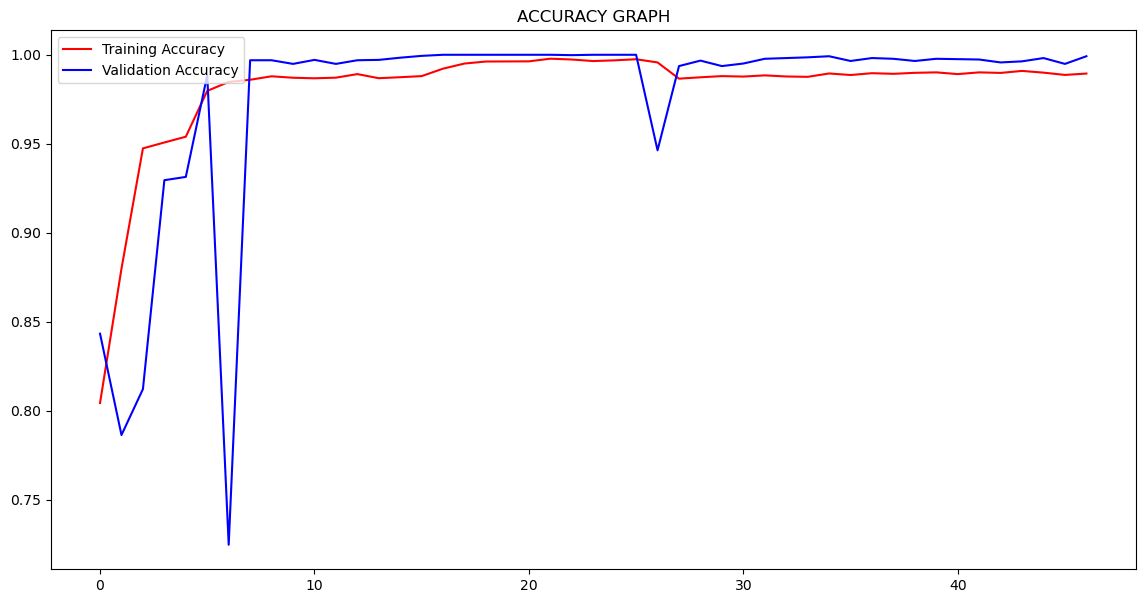

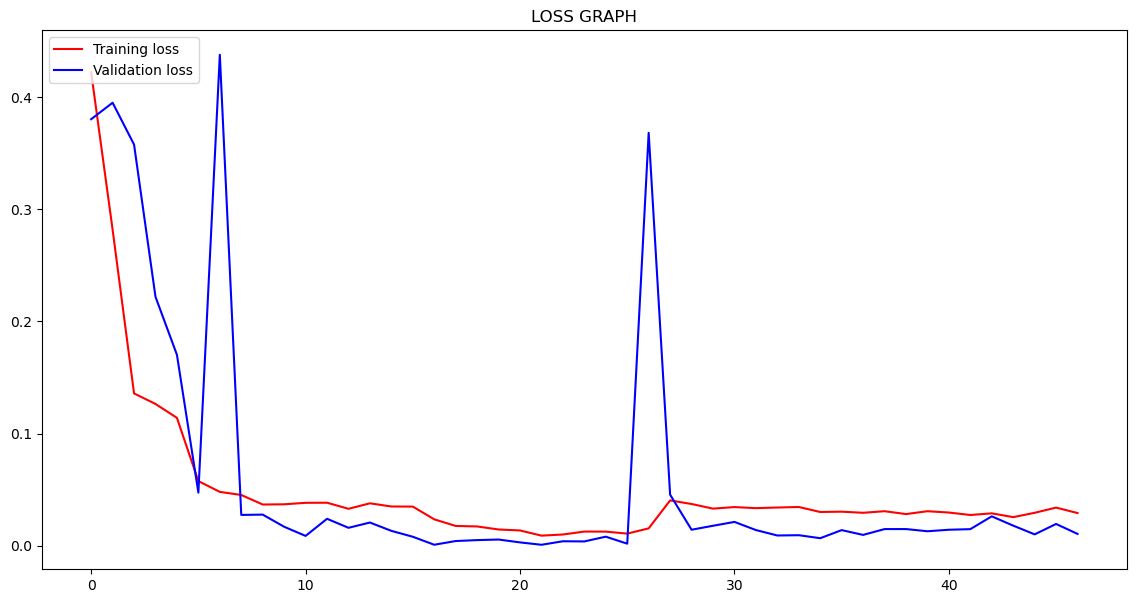

In [29]:
eval_graph(CNN_results_1)

In [30]:
Y_test1

8419     1
6280     1
9859     1
17273    1
20224    1
        ..
14594    1
23027    1
8404     1
5653     1
13667    0
Name: result, Length: 6101, dtype: int64

In [31]:
Y_test1

8419     1
6280     1
9859     1
17273    1
20224    1
        ..
14594    1
23027    1
8404     1
5653     1
13667    0
Name: result, Length: 6101, dtype: int64

191/191 [==============================] - 1s 4ms/step


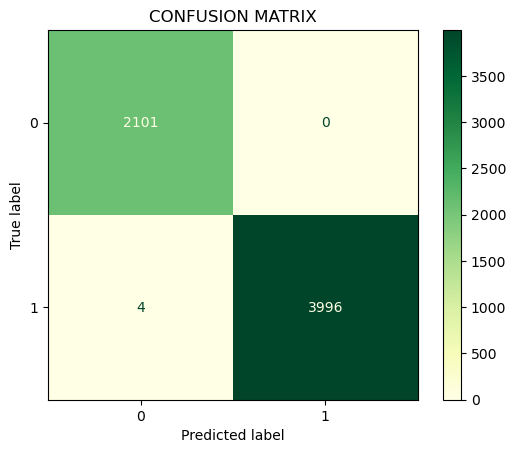

In [32]:
conf_matrix(X_test1,Y_test1,CNN_model1)

In [33]:
# CNN MODEL ON SECOND DATASET
CNN_model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

callbacks = [tf.keras.callbacks.ModelCheckpoint('CNN_MODEL_ON_NON_FEATURE_EXTRACTED.h5',verbose=1,save_best_only=True),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.001,patience=30,verbose=1)]
CNN_results_2 = CNN_model2.fit(X_train2,Y_train2,validation_split=0.2,batch_size=128,epochs=200,callbacks=callbacks)

Epoch 1/200
153/153 [==============================] - ETA: 0s - loss: 0.3911 - accuracy: 0.8771
Epoch 1: val_loss improved from inf to 0.78719, saving model to CNN_MODEL_ON_NON_FEATURE_EXTRACTED.h5
153/153 [==============================] - 77s 487ms/step - loss: 0.3911 - accuracy: 0.8771 - val_loss: 0.7872 - val_accuracy: 0.3401
Epoch 2/200
153/153 [==============================] - ETA: 0s - loss: 0.2220 - accuracy: 0.9126
Epoch 2: val_loss improved from 0.78719 to 0.62391, saving model to CNN_MODEL_ON_NON_FEATURE_EXTRACTED.h5
153/153 [==============================] - 86s 561ms/step - loss: 0.2220 - accuracy: 0.9126 - val_loss: 0.6239 - val_accuracy: 0.6316
Epoch 3/200
153/153 [==============================] - ETA: 0s - loss: 0.1987 - accuracy: 0.9187
Epoch 3: val_loss improved from 0.62391 to 0.40397, saving model to CNN_MODEL_ON_NON_FEATURE_EXTRACTED.h5
153/153 [==============================] - 86s 559ms/step - loss: 0.1987 - accuracy: 0.9187 - val_loss: 0.4040 - val_accuracy: 

153/153 [==============================] - 71s 467ms/step - loss: 0.1118 - accuracy: 0.9541 - val_loss: 0.1642 - val_accuracy: 0.9439
Epoch 29/200
153/153 [==============================] - ETA: 0s - loss: 0.1118 - accuracy: 0.9510
Epoch 29: val_loss did not improve from 0.14402
153/153 [==============================] - 69s 452ms/step - loss: 0.1118 - accuracy: 0.9510 - val_loss: 0.1654 - val_accuracy: 0.9451
Epoch 30/200
153/153 [==============================] - ETA: 0s - loss: 0.1135 - accuracy: 0.9507
Epoch 30: val_loss did not improve from 0.14402
153/153 [==============================] - 67s 440ms/step - loss: 0.1135 - accuracy: 0.9507 - val_loss: 0.2041 - val_accuracy: 0.9396
Epoch 31/200
153/153 [==============================] - ETA: 0s - loss: 0.1148 - accuracy: 0.9534
Epoch 31: val_loss did not improve from 0.14402
153/153 [==============================] - 72s 469ms/step - loss: 0.1148 - accuracy: 0.9534 - val_loss: 0.1607 - val_accuracy: 0.9439
Epoch 32/200
153/153 [====

In [34]:
CNN_model2.evaluate(X_test2,Y_test2,verbose = 1)

191/191 [==============================] - 4s 19ms/step - loss: 0.1620 - accuracy: 0.9472


[0.16195769608020782, 0.9472217559814453]

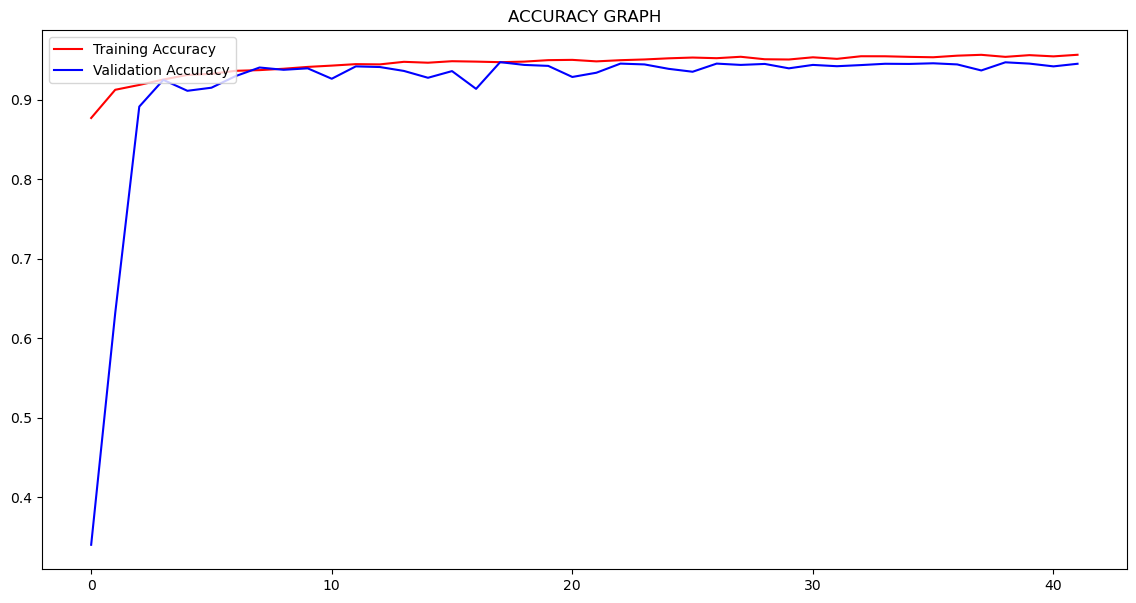

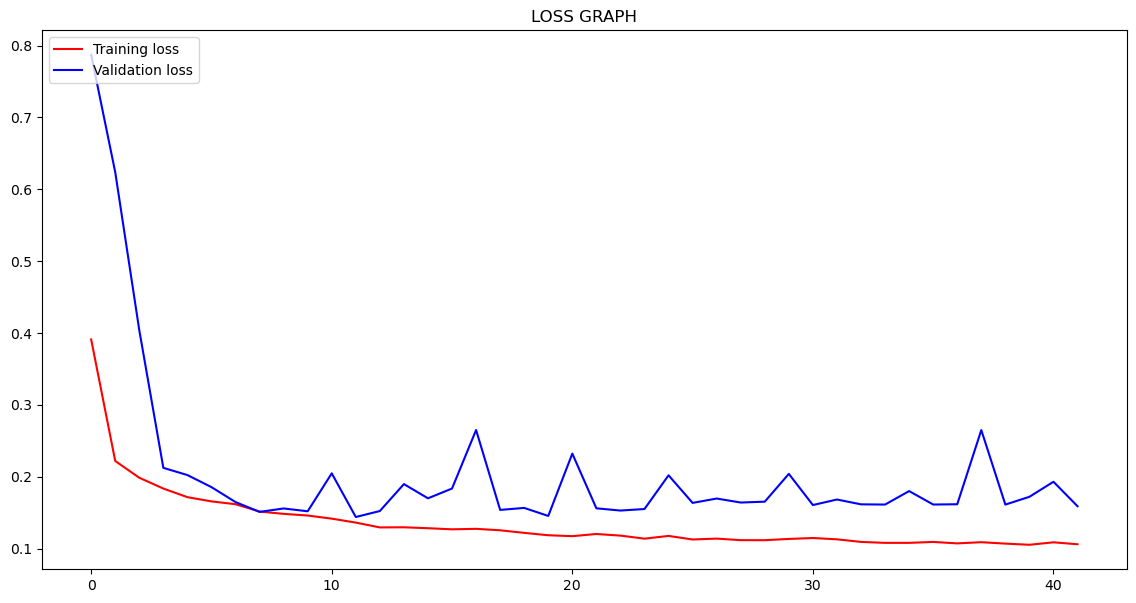

191/191 [==============================] - 4s 19ms/step


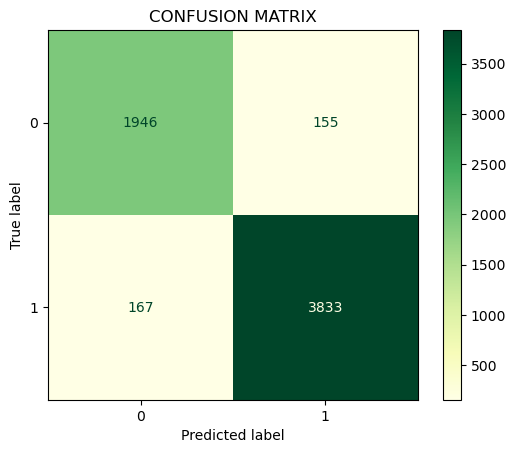

In [35]:
eval_graph(CNN_results_2)
conf_matrix(X_test2,Y_test2,CNN_model2)


In [36]:
# CNN LSTM MODEL
def CNN_LSTM(input_size):
    model = keras.Sequential()
    model.add(layers.Input(input_size))
    model.add(layers.Conv1D(filters = 16,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 32,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 64,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 128,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling1D(pool_size = 2,padding = 'same'))
    model.add(layers.Conv1D(filters = 256,kernel_size = 3,activation = 'relu',padding = 'same'))
    model.add(layers.Dropout(0.2))
    model.add(layers.BatchNormalization())
    model.add(layers.LSTM(128,return_sequences=True))
    model.add(layers.Dropout(0.3))
    model.add(layers.Flatten())
    model.add(layers.Dense(128,activation = 'relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(128,activation = 'relu'))
    model.add(layers.Dropout(0.3))
    model.add(layers.Dense(1,activation = 'sigmoid'))
    
    return model

CNN_LSTM_model1 = CNN_LSTM(input_size1)
CNN_LSTM_model1.summary()
CNN_LSTM_model2 = CNN_LSTM(input_size2)    
CNN_LSTM_model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 37, 16)            64        
                                                                 
 dropout_14 (Dropout)        (None, 37, 16)            0         
                                                                 
 batch_normalization_10 (Bat  (None, 37, 16)           64        
 chNormalization)                                                
                                                                 
 max_pooling1d_10 (MaxPoolin  (None, 19, 16)           0         
 g1D)                                                            
                                                                 
 conv1d_11 (Conv1D)          (None, 19, 32)            1568      
                                                                 
 dropout_15 (Dropout)        (None, 19, 32)           

                                                                 
 dense_7 (Dense)             (None, 128)               1032320   
                                                                 
 dropout_28 (Dropout)        (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dropout_29 (Dropout)        (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,379,169
Trainable params: 1,378,177
Non-trainable params: 992
_________________________________________________________________


In [37]:
# CNN_LSTM MODEL ON FIRST DATASET
CNN_LSTM_model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

callbacks = [tf.keras.callbacks.ModelCheckpoint('CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5',verbose=1,save_best_only=True),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.001,patience=30,verbose=1)]
CNN_LSTM_results_1 = CNN_LSTM_model1.fit(X_train1,Y_train1,validation_split=0.2,batch_size=128,epochs=200,callbacks=callbacks)

Epoch 1/200
153/153 [==============================] - ETA: 0s - loss: 0.2222 - accuracy: 0.9052
Epoch 1: val_loss improved from inf to 0.41864, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5
153/153 [==============================] - 12s 45ms/step - loss: 0.2222 - accuracy: 0.9052 - val_loss: 0.4186 - val_accuracy: 0.7578
Epoch 2/200
153/153 [==============================] - ETA: 0s - loss: 0.1229 - accuracy: 0.9534
Epoch 2: val_loss did not improve from 0.41864
153/153 [==============================] - 8s 53ms/step - loss: 0.1229 - accuracy: 0.9534 - val_loss: 1.4007 - val_accuracy: 0.6753
Epoch 3/200
153/153 [==============================] - ETA: 0s - loss: 0.0556 - accuracy: 0.9827
Epoch 3: val_loss improved from 0.41864 to 0.22402, saving model to CNN_LSTM_MODEL_ON_FEATURE_EXTRACTED.h5
153/153 [==============================] - 8s 51ms/step - loss: 0.0556 - accuracy: 0.9827 - val_loss: 0.2240 - val_accuracy: 0.8957
Epoch 4/200
152/153 [============================>.] - 

153/153 [==============================] - ETA: 0s - loss: 0.0098 - accuracy: 0.9972
Epoch 28: val_loss did not improve from 0.00010
153/153 [==============================] - 6s 39ms/step - loss: 0.0098 - accuracy: 0.9972 - val_loss: 8.6915e-04 - val_accuracy: 1.0000
Epoch 29/200
153/153 [==============================] - ETA: 0s - loss: 0.0093 - accuracy: 0.9976
Epoch 29: val_loss did not improve from 0.00010
153/153 [==============================] - 6s 40ms/step - loss: 0.0093 - accuracy: 0.9976 - val_loss: 1.7525e-04 - val_accuracy: 1.0000
Epoch 30/200
153/153 [==============================] - ETA: 0s - loss: 0.0074 - accuracy: 0.9981
Epoch 30: val_loss did not improve from 0.00010
153/153 [==============================] - 6s 41ms/step - loss: 0.0074 - accuracy: 0.9981 - val_loss: 4.8536e-04 - val_accuracy: 0.9998
Epoch 31/200
152/153 [============================>.] - ETA: 0s - loss: 0.0076 - accuracy: 0.9974
Epoch 31: val_loss did not improve from 0.00010
153/153 [============

191/191 [==============================] - 1s 6ms/step - loss: 3.2362e-05 - accuracy: 1.0000


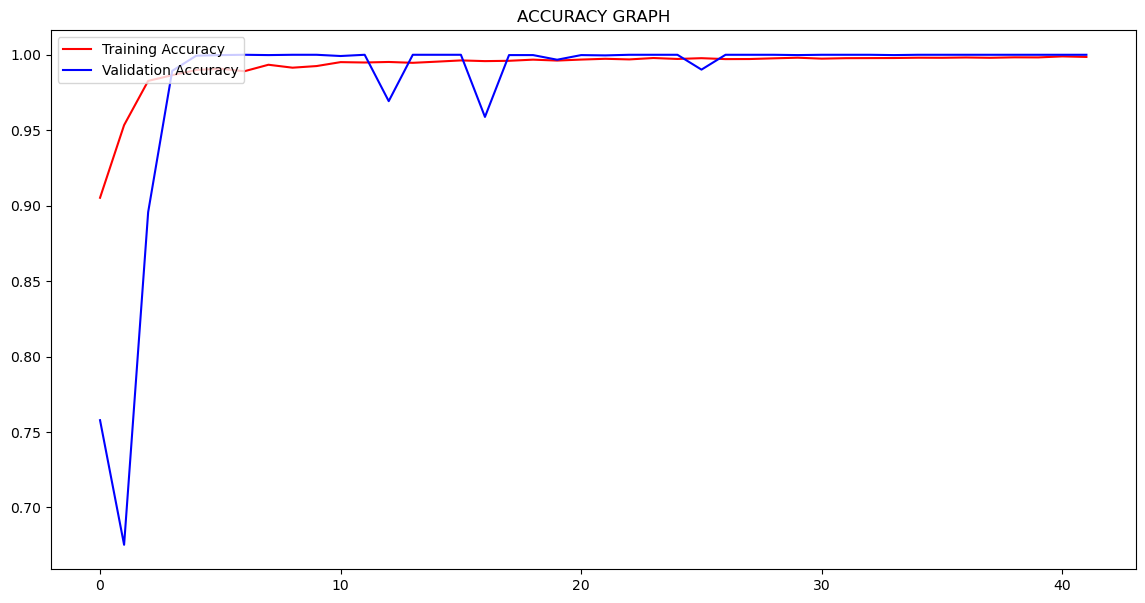

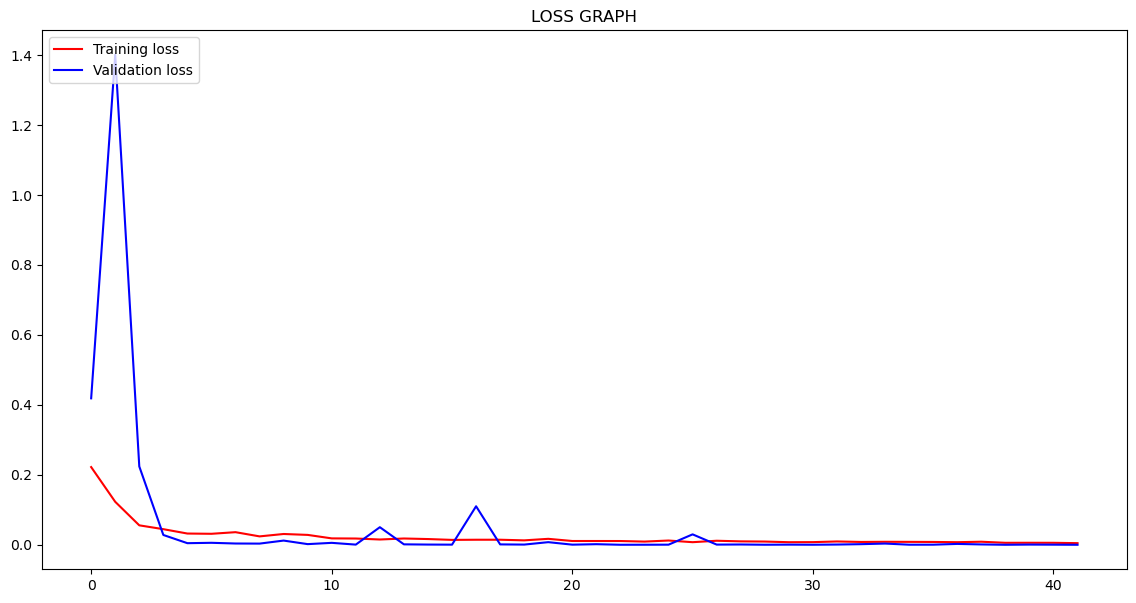

191/191 [==============================] - 2s 5ms/step


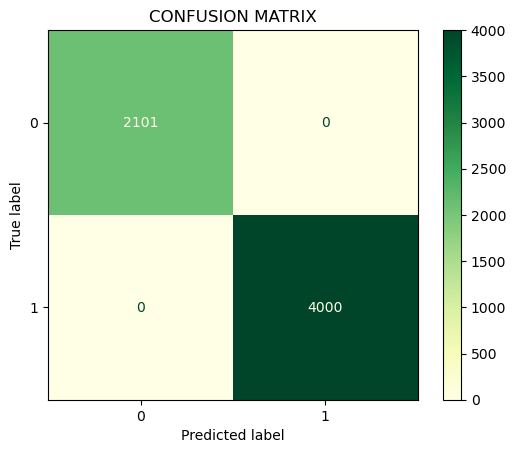

In [38]:
CNN_LSTM_model1.evaluate(X_test1,Y_test1)
eval_graph(CNN_LSTM_results_1)
conf_matrix(X_test1,Y_test1,CNN_LSTM_model1)

In [39]:
# CNN_LSTM MODEL ON SECOND DATASET
CNN_LSTM_model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

callbacks = [tf.keras.callbacks.ModelCheckpoint('CNN_LSTM_MODEL_ON_NON_FEATURE_EXTRACTED.h5',verbose=1,save_best_only=True),
             tf.keras.callbacks.EarlyStopping(monitor='val_loss',min_delta=0.001,patience=30,verbose=1)]
CNN_LSTM_results_2 = CNN_LSTM_model2.fit(X_train2,Y_train2,validation_split=0.2,batch_size=128,epochs=200,callbacks=callbacks)

Epoch 1/200
153/153 [==============================] - ETA: 0s - loss: 0.2769 - accuracy: 0.8790
Epoch 1: val_loss improved from inf to 0.68278, saving model to CNN_LSTM_MODEL_ON_NON_FEATURE_EXTRACTED.h5
153/153 [==============================] - 113s 709ms/step - loss: 0.2769 - accuracy: 0.8790 - val_loss: 0.6828 - val_accuracy: 0.4227
Epoch 2/200
153/153 [==============================] - ETA: 0s - loss: 0.2045 - accuracy: 0.9164
Epoch 2: val_loss improved from 0.68278 to 0.58023, saving model to CNN_LSTM_MODEL_ON_NON_FEATURE_EXTRACTED.h5
153/153 [==============================] - 103s 673ms/step - loss: 0.2045 - accuracy: 0.9164 - val_loss: 0.5802 - val_accuracy: 0.7273
Epoch 3/200
153/153 [==============================] - ETA: 0s - loss: 0.1826 - accuracy: 0.9255
Epoch 3: val_loss improved from 0.58023 to 0.23593, saving model to CNN_LSTM_MODEL_ON_NON_FEATURE_EXTRACTED.h5
153/153 [==============================] - 94s 613ms/step - loss: 0.1826 - accuracy: 0.9255 - val_loss: 0.2359

153/153 [==============================] - 98s 641ms/step - loss: 0.1053 - accuracy: 0.9570 - val_loss: 0.1590 - val_accuracy: 0.9476
Epoch 29/200
153/153 [==============================] - ETA: 0s - loss: 0.1047 - accuracy: 0.9557
Epoch 29: val_loss did not improve from 0.14096
153/153 [==============================] - 102s 665ms/step - loss: 0.1047 - accuracy: 0.9557 - val_loss: 0.1595 - val_accuracy: 0.9478
Epoch 30/200
153/153 [==============================] - ETA: 0s - loss: 0.1032 - accuracy: 0.9572
Epoch 30: val_loss did not improve from 0.14096
153/153 [==============================] - 97s 636ms/step - loss: 0.1032 - accuracy: 0.9572 - val_loss: 0.1669 - val_accuracy: 0.9461
Epoch 31/200
153/153 [==============================] - ETA: 0s - loss: 0.1041 - accuracy: 0.9569
Epoch 31: val_loss did not improve from 0.14096
153/153 [==============================] - 103s 676ms/step - loss: 0.1041 - accuracy: 0.9569 - val_loss: 0.1612 - val_accuracy: 0.9471
Epoch 32/200
153/153 [==

191/191 [==============================] - 12s 61ms/step - loss: 0.1850 - accuracy: 0.9472


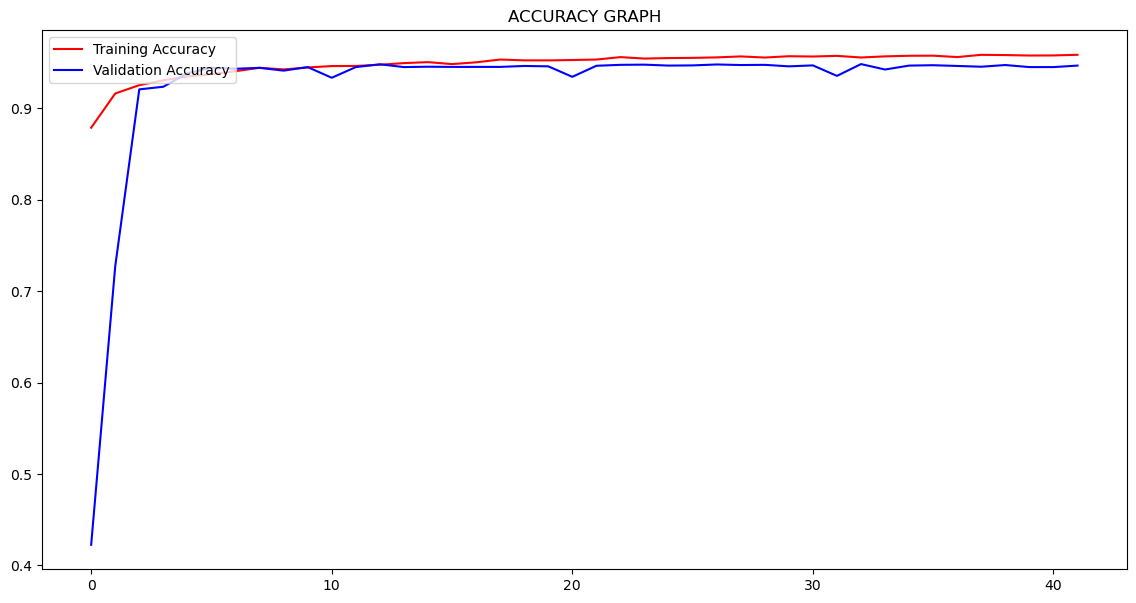

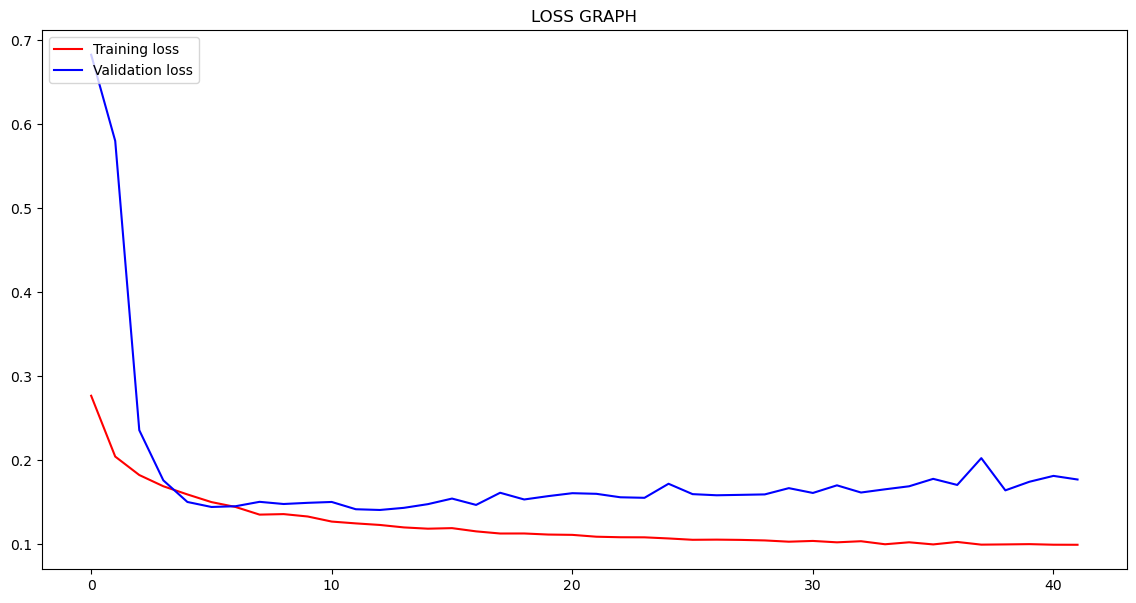

191/191 [==============================] - 9s 42ms/step


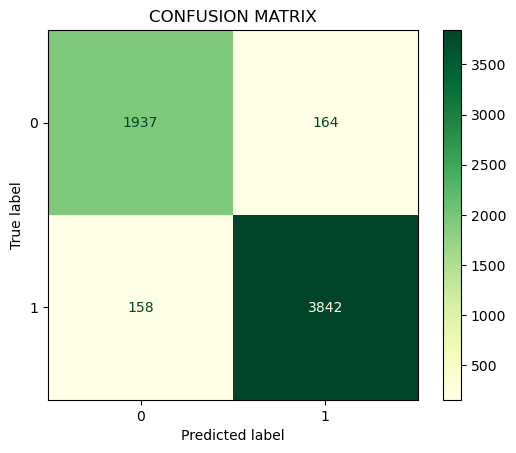

In [40]:
CNN_LSTM_model2.evaluate(X_test2,Y_test2)
eval_graph(CNN_LSTM_results_2)
conf_matrix(X_test2,Y_test2,CNN_LSTM_model2)